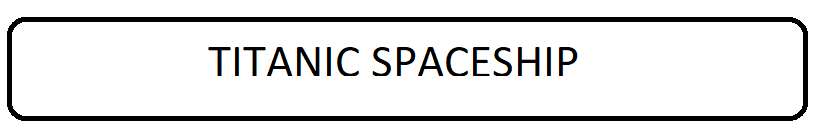   

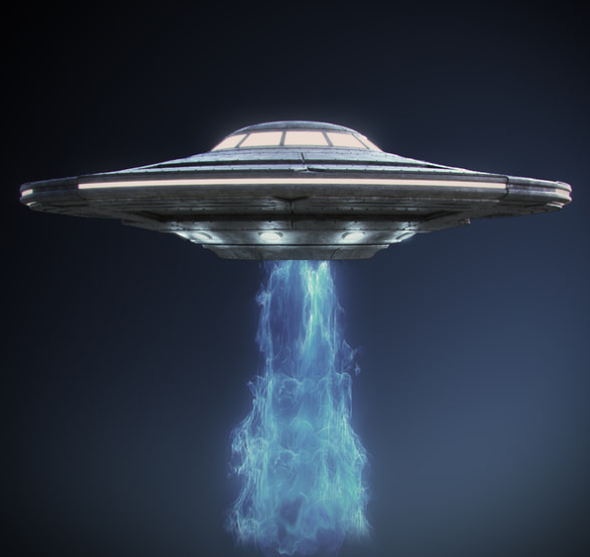

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



To help rescue crews and retrieve the lost passengers, I took challenge to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

# BINARY CLASS CLASSIFICATION MODEL

- A binary class classification model is a type of machine learning model used to
classify input data into one of two possible classes or categories
- The term 'binary' refers to the fact taht there are only two distinct classes, often denoted as 0 or 1 or sometimes as positive and negative classes or true or false classes
- Binary classification models aim to learn patterns and relationships from labeled training data

## COMMON ALGORITHMS FOR BINARY CLASS

- Some Common algorithms which we have used here:

- (1)Logistic Regrression   (2)Random Forest  (3)Decision Trees  (4)K-Nearest Neighbors

# WORKFLOW:

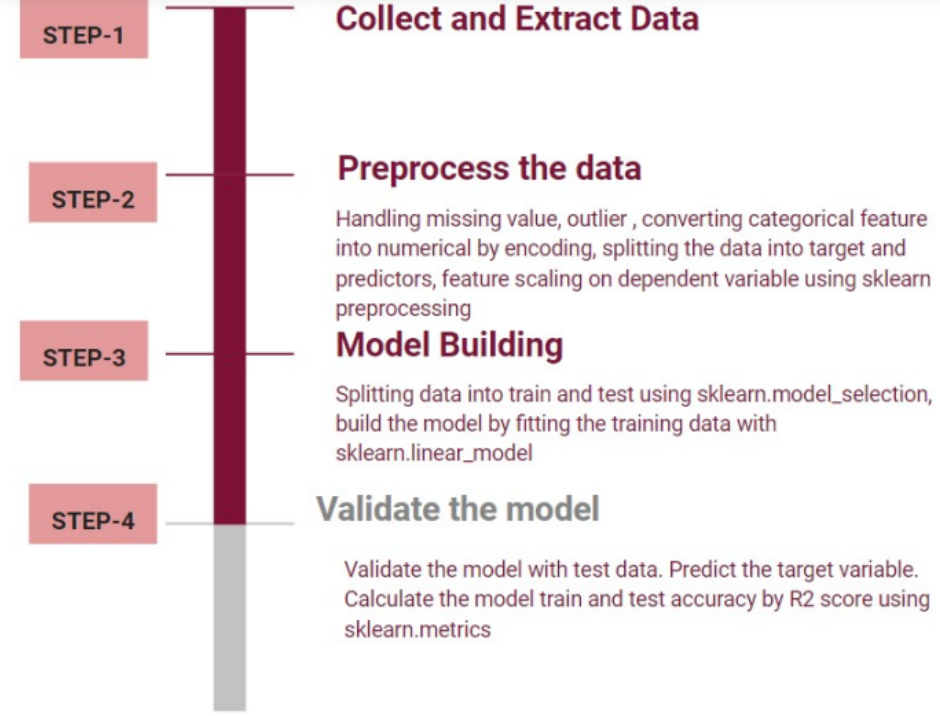

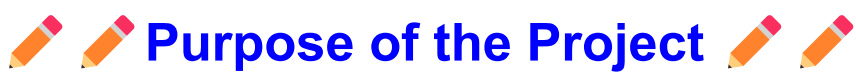


### Exploratory data analysis (EDA) is one of the most significant methods to examine the data we have. In this project, we are going to explore the hidden patterns in the dataset and extract information from them.

## Models implemented:
### In the dataset, the target variable has 2 possible outcomes/classes. It is a classification problem.
### - 🎯 Binary class Logistic Regression
### - 🎯 Decision Tree Classifier
### - 🎯 Bagging Classifier
### - 🎯 Random Forest Classifier
### - 🎯 KNearestNeighbour Classifier
### - 🎯 Support Vector Machine


# POINTS TO REMEMBER TO PREDICT A GOOD CLASSIFICATION MODEL

## About Dataset

### 'TITANIC SPACESHIP'

#### 👉-train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

#### 👉- PassengerId - 
- A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

#### 👉-HomePlanet - 
- The planet the passenger departed from, typically their planet of permanent residence.

#### 👉-CryoSleep -
- Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

#### 👉-Cabin - 
- The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

#### 👉-Destination - 
- The planet the passenger will be debarking to.

#### 👉-Age - 
- The age of the passenger.

#### 👉-VIP - 
- Whether the passenger has paid for special VIP service during the voyage.

#### 👉-RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 
- Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

#### 👉-Name - 
- The first and last names of the passenger.

#### 👉-Transported - 
- Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

#### 👉-test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Loading and Reading Dataset

In [2]:
test_data=pd.read_csv('spaceshiptest.csv')
train_data=pd.read_csv('spaceshiptrain.csv')

In [3]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_data['Transported']=train_data['Transported'].astype('category')
train_data['Transported']=train_data['Transported'].cat.codes

In [6]:
test_data['data']='test'
train_data['data']='train'

In [7]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,data
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,test
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,test
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,test
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,test
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,test


In [8]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,data
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,train


In [9]:
space_df=pd.concat([test_data,train_data],axis=0)

In [10]:
space_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,data,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,test,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,test,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,test,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,test,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,train,0.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,train,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,train,1.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,train,0.0


## Finding Unique values

In [11]:
for col in space_df.columns:
 print('='*75)
 print(" "*25,col)
 print('='*75)
 print(space_df[col].unique())


                          PassengerId
['0013_01' '0018_01' '0019_01' ... '9279_01' '9280_01' '9280_02']
                          HomePlanet
['Earth' 'Europa' 'Mars' nan]
                          CryoSleep
[True False nan]
                          Cabin
['G/3/S' 'F/4/S' 'C/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
                          Destination
['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
                          Age
[27. 19. 31. 38. 20. 21. 23. 24. 45. 44. 46. 29. 40. 30. 14. 66. 36. 18.
 26. 48.  6. 33. nan  1. 17. 34.  5. 22. 16.  7.  2.  0. 56. 39. 35.  8.
  3.  9. 25. 42. 50. 41. 32. 49. 55. 60. 47. 58. 28. 12. 52. 15. 43. 54.
 70. 37. 59. 61. 63. 53.  4. 10. 65. 13. 51. 79. 74. 67. 69. 57. 72. 75.
 11. 73. 71. 64. 62. 78. 77. 68. 76.]
                          VIP
[False nan True]
                          RoomService
[   0.   10.  339. ... 1569. 8586.  745.]
                          FoodCourt
[   0.    9. 6652. ... 3208. 6819. 4688.]
                          Sho

## To find the information about the data set

In [12]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  data          12970 non-null  object 
 14  Transported   8693 non-null   float64
dtypes: float64(7), object(8)
memory usage: 1.6+ MB


- 👉- Total there are 14 independent variables (6 are of dtype float, 8 is of dtype object)
- 👉-1 dependent variable is of type float 
- 👉- out of 15, 13 columns are having missing data

## Descriptive statistics(Univariate analysis)

In [13]:
space_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.0,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.0,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.0,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.0,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.0,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.0,24133.0
Transported,8693.0,0.503624,0.500016,0.0,0.0,1.0,1.0,1.0


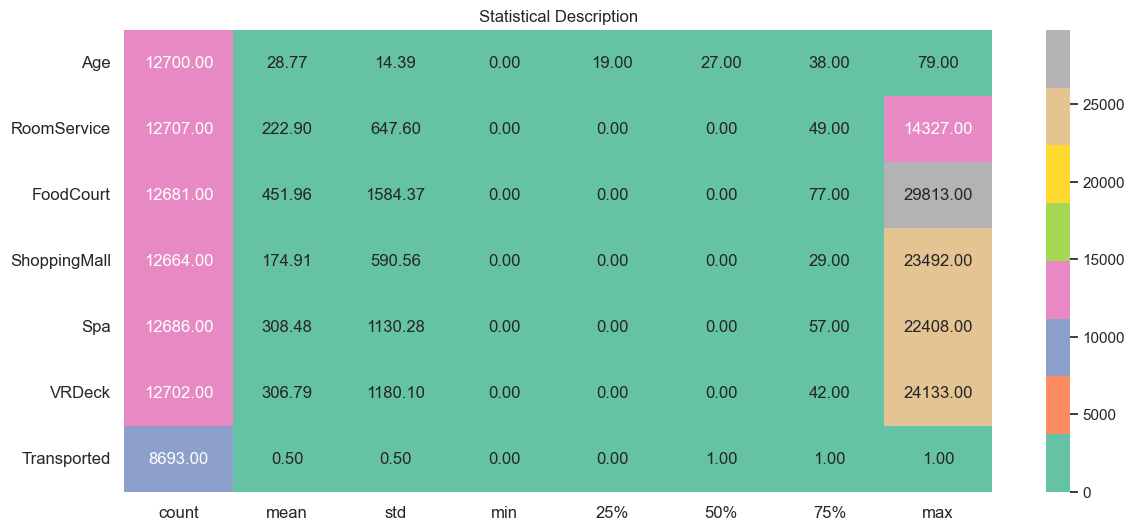

In [14]:
def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index=df.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(space_df)

# PREPROCESSING:

### 🎯  Checking null values

In [15]:
space_df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
data               0
Transported     4277
dtype: int64

In [16]:
space_df.isnull().sum()/len(space_df)*100

PassengerId      0.000000
HomePlanet       2.220509
CryoSleep        2.390131
Cabin            2.305320
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Name             2.266769
data             0.000000
Transported     32.976099
dtype: float64

In [17]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  data          12970 non-null  object 
 14  Transported   8693 non-null   float64
dtypes: float64(7), object(8)
memory usage: 1.6+ MB


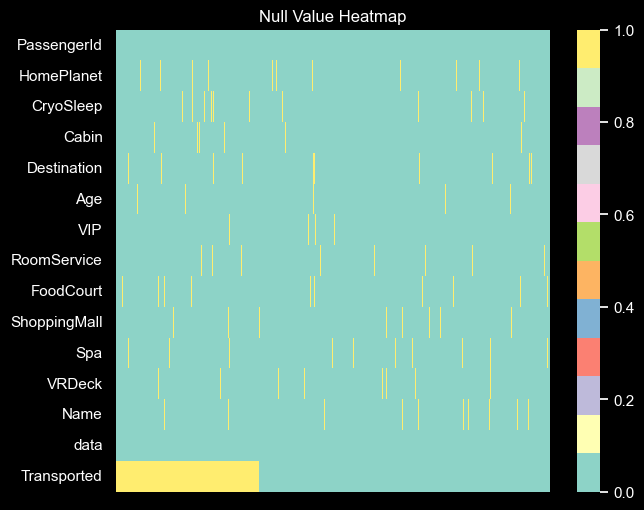

In [18]:
# Create a heatmap of null values
plt.style.use('dark_background')
plt.figure(figsize=(7, 6))
sns.heatmap(space_df.isnull().T, cmap='Set3', cbar=True, xticklabels= False)
plt.title('Null Value Heatmap')
# Display the plot
plt.show()


### dropping non-significant columns

In [19]:
space_df.drop(['PassengerId','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'],axis=1,inplace=True)

In [20]:
space_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,data,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,test,NaN
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,test,NaN
2,Europa,True,C/0/S,55 Cancri e,31.0,test,NaN
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,test,NaN
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,test,NaN
...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,train,0.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,train,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,train,1.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,train,0.0


In [21]:
space_df.isnull().sum()/len(space_df)*100

HomePlanet      2.220509
CryoSleep       2.390131
Cabin           2.305320
Destination     2.112567
Age             2.081727
data            0.000000
Transported    32.976099
dtype: float64

In [22]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   12682 non-null  object 
 1   CryoSleep    12660 non-null  object 
 2   Cabin        12671 non-null  object 
 3   Destination  12696 non-null  object 
 4   Age          12700 non-null  float64
 5   data         12970 non-null  object 
 6   Transported  8693 non-null   float64
dtypes: float64(2), object(5)
memory usage: 1.3+ MB


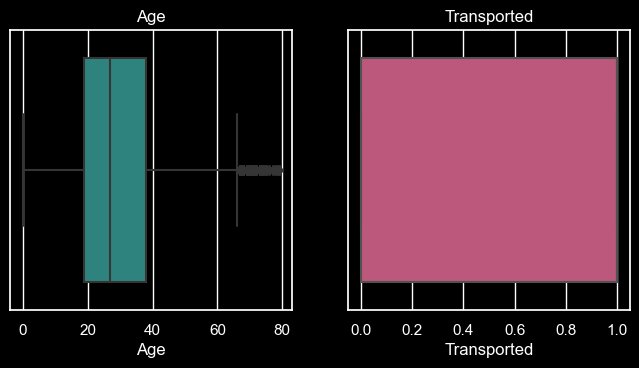

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Age')
sns.boxplot(space_df["Age"],palette='viridis')


plt.subplot(2,2,2)
plt.title('Transported')
sns.boxplot(space_df["Transported"],palette='plasma')

plt.show()

In [24]:
space_df['Age']=space_df['Age'].fillna(space_df['Age'].median())

In [25]:
def impute(col):
    space_df[col]=space_df[col].fillna(space_df[col].mode().iloc[0])
    
    
for i in list(space_df.columns)[0:4]:
    impute(i)


In [26]:
space_df.isnull().sum()/len(space_df)*100

HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.000000
Destination     0.000000
Age             0.000000
data            0.000000
Transported    32.976099
dtype: float64

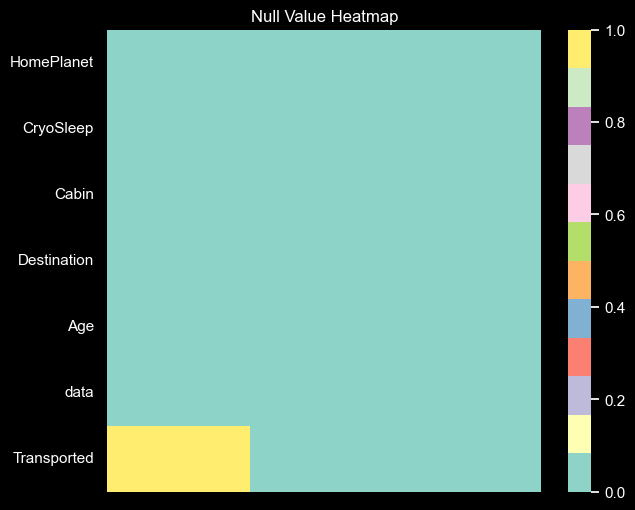

In [27]:
# Create a heatmap of null values
plt.style.use('dark_background')
plt.figure(figsize=(7, 6))
sns.heatmap(space_df.isnull().T, cmap='Set3', cbar=True, xticklabels= False)
plt.title('Null Value Heatmap')
# Display the plot
plt.show()

#### 👉-  NO Null Values

## 🎯 ENCODING:

In [28]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   12970 non-null  object 
 1   CryoSleep    12970 non-null  bool   
 2   Cabin        12970 non-null  object 
 3   Destination  12970 non-null  object 
 4   Age          12970 non-null  float64
 5   data         12970 non-null  object 
 6   Transported  8693 non-null   float64
dtypes: bool(1), float64(2), object(4)
memory usage: 1.2+ MB


In [29]:
space_df['HomePlanet'].value_counts()

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [30]:
space_df['CryoSleep'].value_counts()

False    8389
True     4581
Name: CryoSleep, dtype: int64

In [31]:
space_df['Cabin'].value_counts()

G/160/P     307
G/734/S       8
B/31/P        7
F/1411/P      7
E/228/S       7
           ... 
C/13/P        1
B/13/S        1
G/62/S        1
F/77/S        1
F/457/S       1
Name: Cabin, Length: 9825, dtype: int64

In [32]:
space_df['Destination'].value_counts()

TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [33]:
space_df['Cabin']=space_df['Cabin'].astype('category')
space_df['Cabin']=space_df['Cabin'].cat.codes

In [34]:
space_df['CryoSleep']=space_df['CryoSleep'].astype('category')
space_df['CryoSleep']=space_df['CryoSleep'].cat.codes

In [35]:
space_df=pd.get_dummies(data=space_df,columns=['HomePlanet','Destination'])

In [36]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int8   
 1   Cabin                      12970 non-null  int16  
 2   Age                        12970 non-null  float64
 3   data                       12970 non-null  object 
 4   Transported                8693 non-null   float64
 5   HomePlanet_Earth           12970 non-null  uint8  
 6   HomePlanet_Europa          12970 non-null  uint8  
 7   HomePlanet_Mars            12970 non-null  uint8  
 8   Destination_55 Cancri e    12970 non-null  uint8  
 9   Destination_PSO J318.5-22  12970 non-null  uint8  
 10  Destination_TRAPPIST-1e    12970 non-null  uint8  
dtypes: float64(2), int16(1), int8(1), object(1), uint8(6)
memory usage: 1.0+ MB


In [37]:
space_df.drop(['HomePlanet_Mars','Destination_55 Cancri e'],axis=1,inplace=True)

In [38]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int8   
 1   Cabin                      12970 non-null  int16  
 2   Age                        12970 non-null  float64
 3   data                       12970 non-null  object 
 4   Transported                8693 non-null   float64
 5   HomePlanet_Earth           12970 non-null  uint8  
 6   HomePlanet_Europa          12970 non-null  uint8  
 7   Destination_PSO J318.5-22  12970 non-null  uint8  
 8   Destination_TRAPPIST-1e    12970 non-null  uint8  
dtypes: float64(2), int16(1), int8(1), object(1), uint8(4)
memory usage: 1010.0+ KB


## 🎯 Outliers Handling

<AxesSubplot:title={'center':'Cabin'}, xlabel='Cabin'>

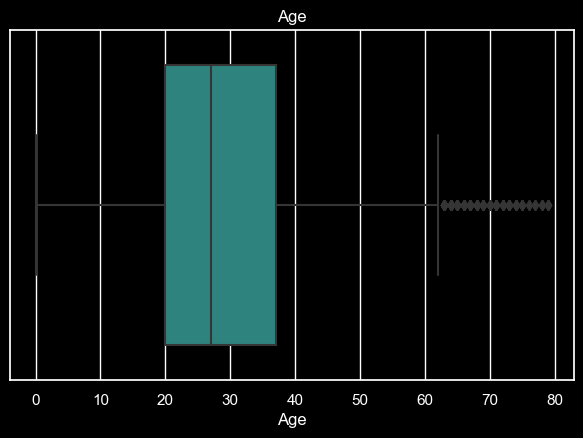

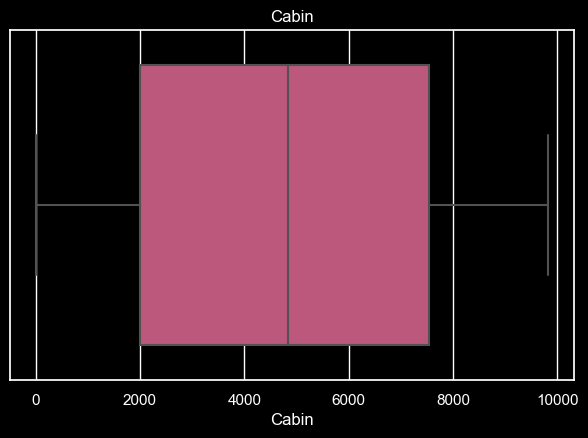

In [39]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.title('Age')
sns.boxplot(space_df["Age"],palette='viridis')
plt.figure(figsize=(16,10))
plt.subplot(2,2,2)
plt.title('Cabin')
sns.boxplot(space_df["Cabin"],palette='plasma')

<AxesSubplot:xlabel='Transported', ylabel='Cabin'>

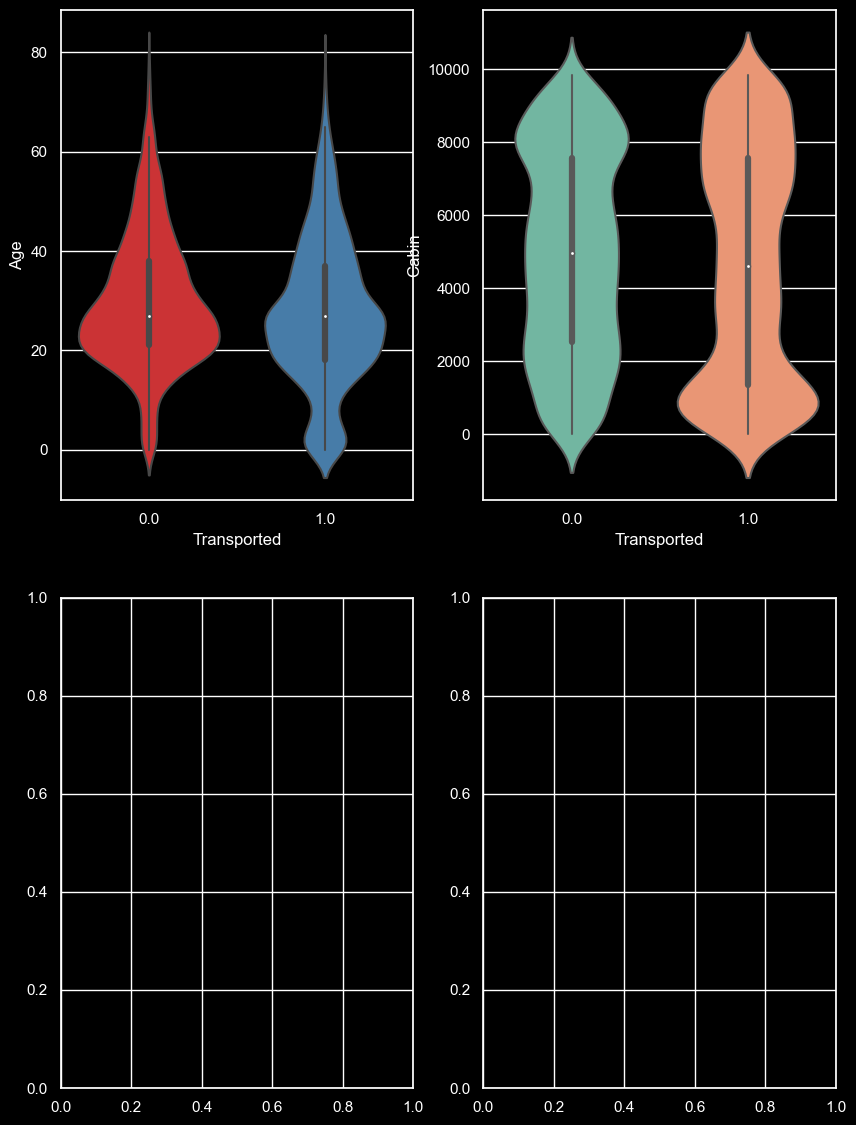

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(10, 14))
sns.violinplot(x="Transported", y='Age', data=space_df, palette='Set1',ax=axes[0, 0],)
sns.violinplot(x="Transported", y='Cabin', data=space_df, palette='Set2',ax=axes[0, 1],)


In [41]:
space_df.head()

,CryoSleep,Cabin,Age,data,Transported,HomePlanet_Earth,HomePlanet_Europa,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,8298,27.0,test,NaN,1,0,0,1
1,0,5564,19.0,test,NaN,1,0,0,1
2,1,856,31.0,test,NaN,0,1,0,0
3,0,858,38.0,test,NaN,0,1,0,1
4,0,5785,20.0,test,NaN,1,0,0,1


### 👉-No need of outlier treatment as all are binary columns value and the each and every passengers age is mandatory so keep it as it is 

### 👉- No feature scaling required for the data 

## 🎯Imbalance data check

In [42]:
space_df['Transported'].value_counts()

1.0    4378
0.0    4315
Name: Transported, dtype: int64

### 👉-majority<2*minority===>balanced data

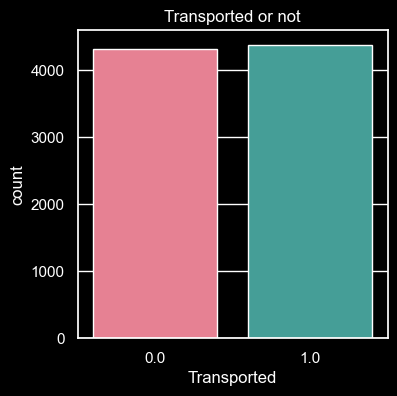

In [43]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= space_df.Transported , data= space_df, palette ='husl')
ax.set_title('Transported or not')
plt.show()

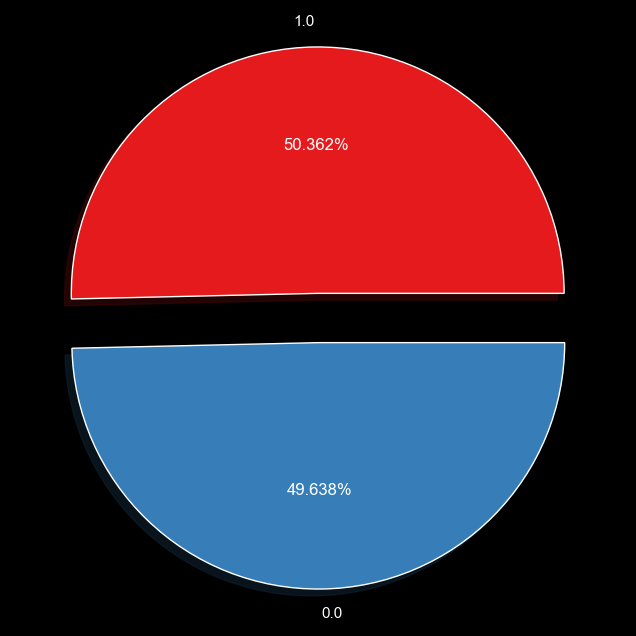

In [44]:
plt.figure(figsize=(8,8),dpi=100)
plt.pie(space_df['Transported'].value_counts()*100/len(space_df),
        labels=space_df['Transported'].value_counts().index,
        autopct='%.3f%%',shadow=True,explode=[0.1 for i in range(2)],colors=sns.color_palette('Set1'))
plt.show()


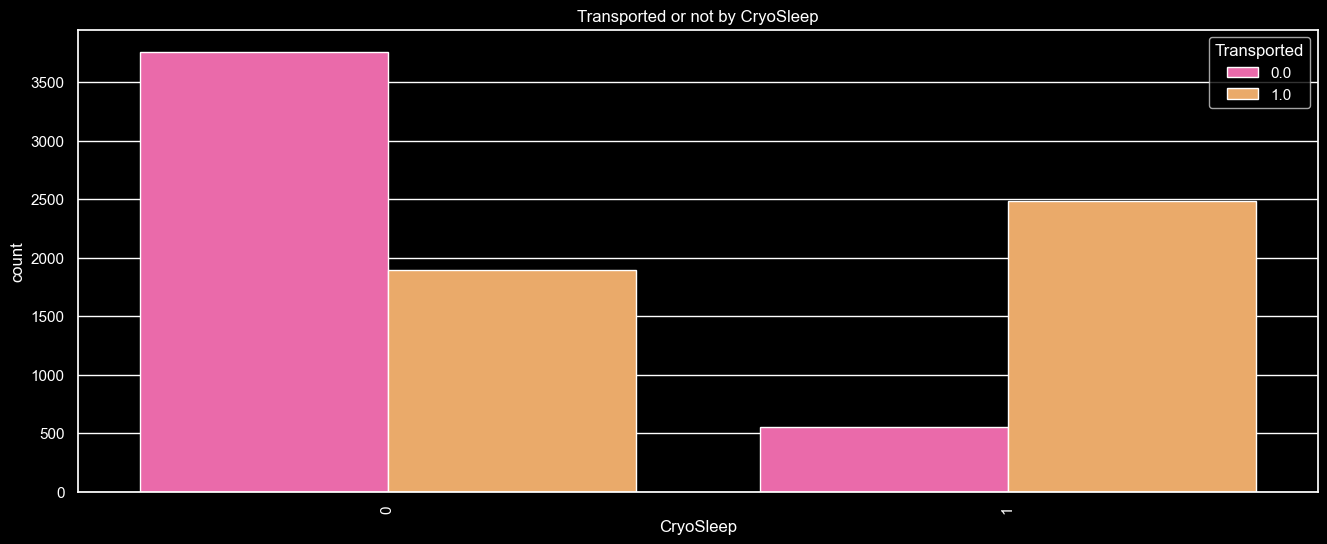

In [45]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= space_df['CryoSleep'] , hue= space_df['Transported'], palette ='spring')
ax.set_title('Transported or not by CryoSleep')
plt.show()

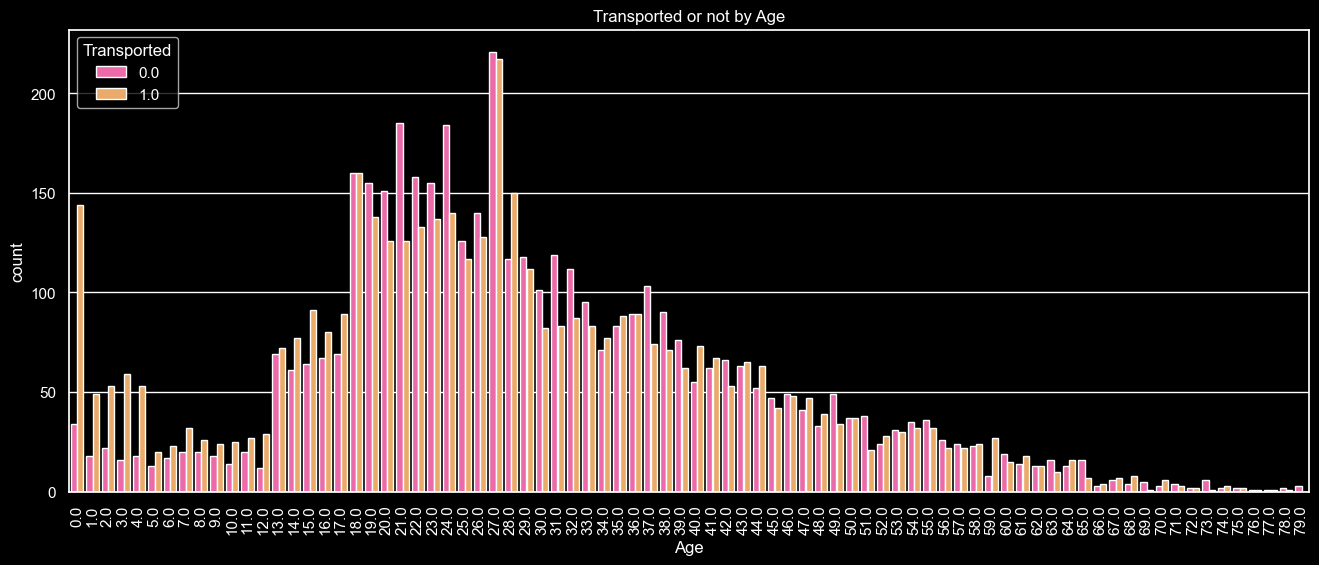

In [46]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= space_df['Age'] , hue= space_df['Transported'], palette ='spring')
ax.set_title('Transported or not by Age')
plt.show()

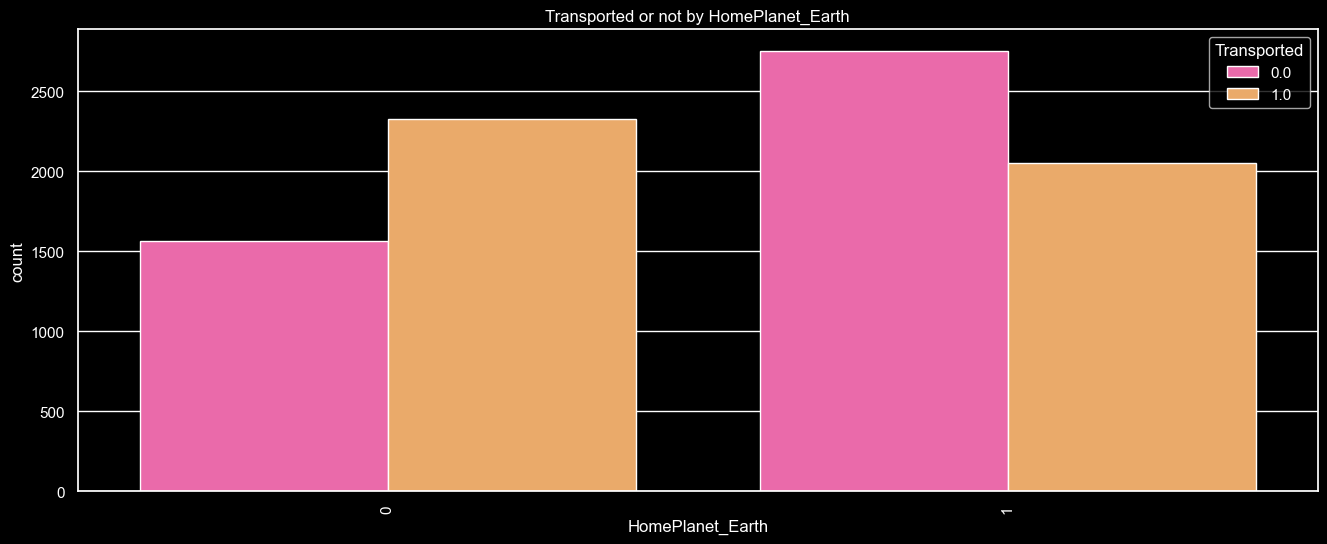

In [47]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= space_df['HomePlanet_Earth'] , hue= space_df['Transported'], palette ='spring')
ax.set_title('Transported or not by HomePlanet_Earth')
plt.show()

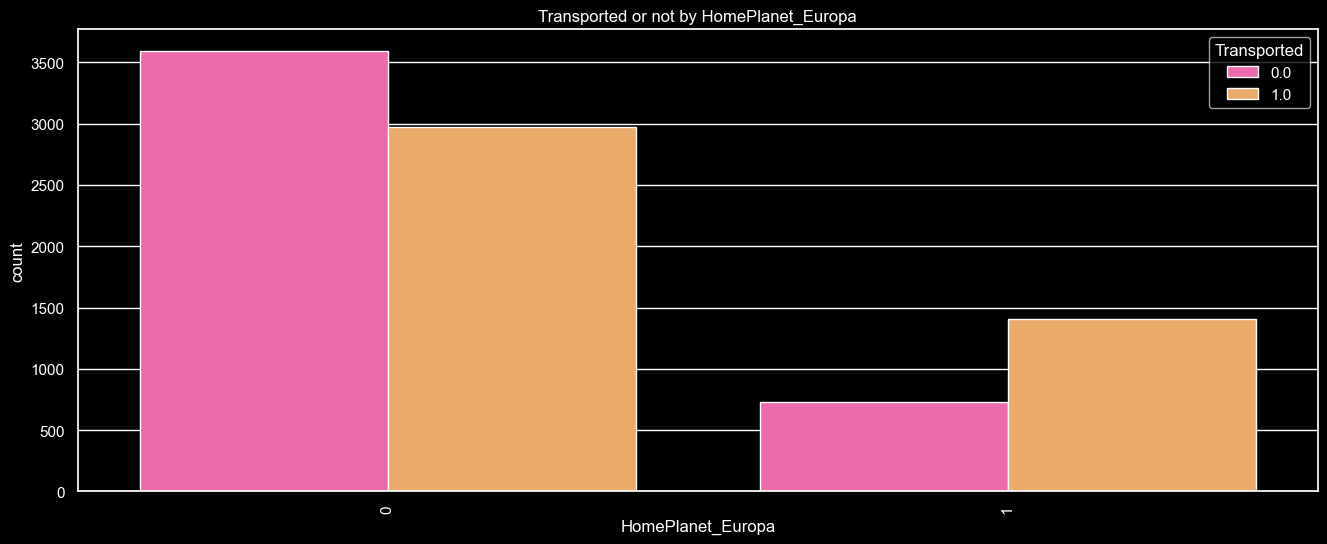

In [48]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= space_df['HomePlanet_Europa'] , hue= space_df['Transported'], palette ='spring')
ax.set_title('Transported or not by HomePlanet_Europa')
plt.show()

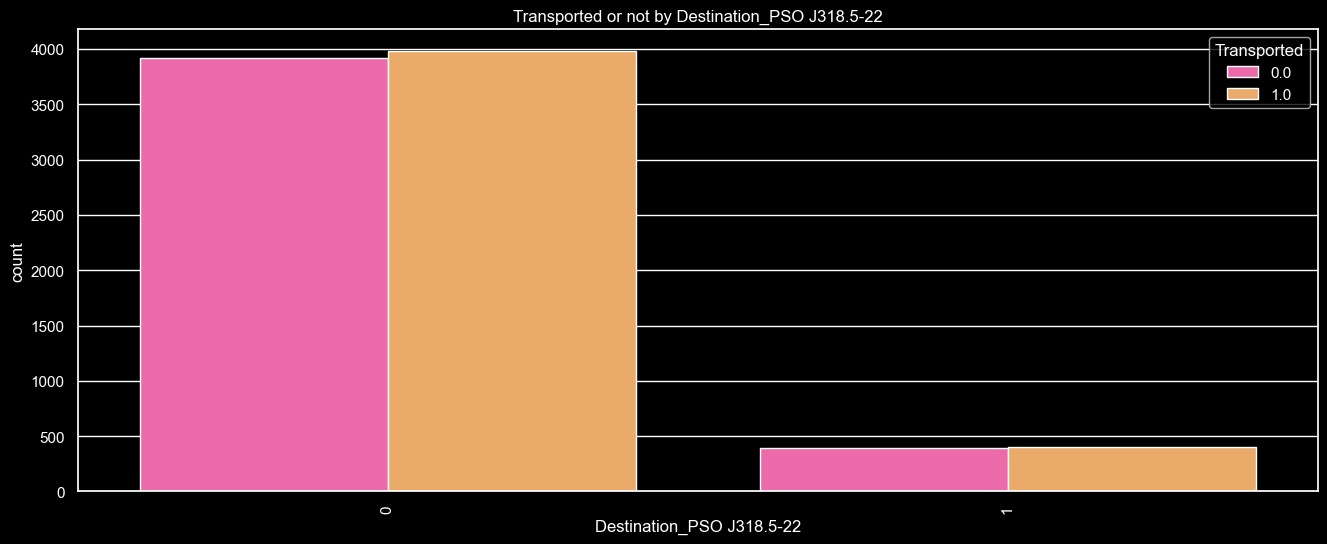

In [164]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= space_df['Destination_PSO J318.5-22'] , hue= space_df['Transported'], palette ='spring')
ax.set_title('Transported or not by Destination_PSO J318.5-22')
plt.show()

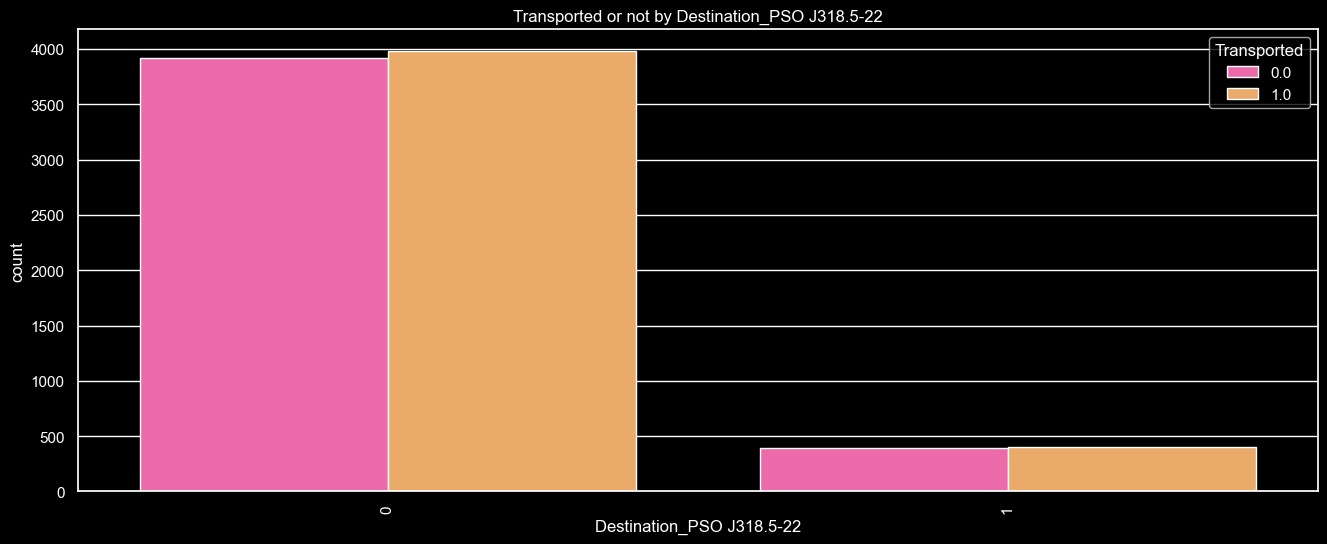

In [165]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= space_df['Destination_PSO J318.5-22'] , hue= space_df['Transported'], palette ='spring')
ax.set_title('Transported or not by Destination_PSO J318.5-22')
plt.show()

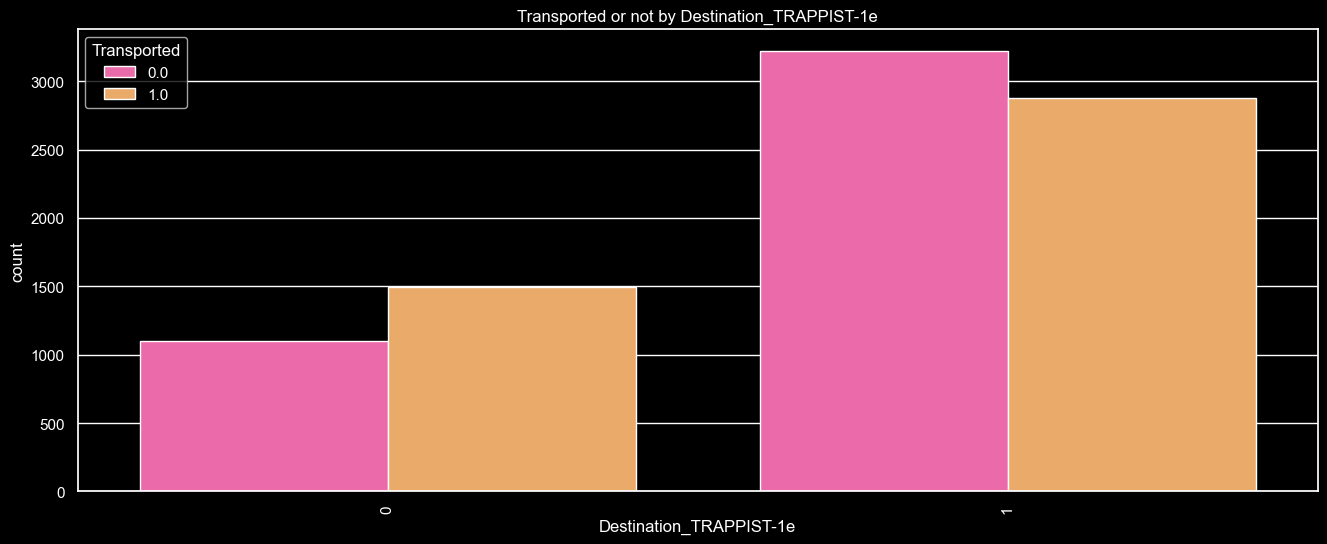

In [166]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= space_df['Destination_TRAPPIST-1e'] , hue= space_df['Transported'], palette ='spring')
ax.set_title('Transported or not by Destination_TRAPPIST-1e')
plt.show()

## Distributions

In [167]:
space_df.head()

,CryoSleep,Cabin,Age,data,Transported,HomePlanet_Earth,HomePlanet_Europa,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,8298,27.0,test,NaN,1,0,0,1
1,0,5564,19.0,test,NaN,1,0,0,1
2,1,856,31.0,test,NaN,0,1,0,0
3,0,858,38.0,test,NaN,0,1,0,1
4,0,5785,20.0,test,NaN,1,0,0,1


<AxesSubplot:xlabel='CryoSleep', ylabel='Density'>

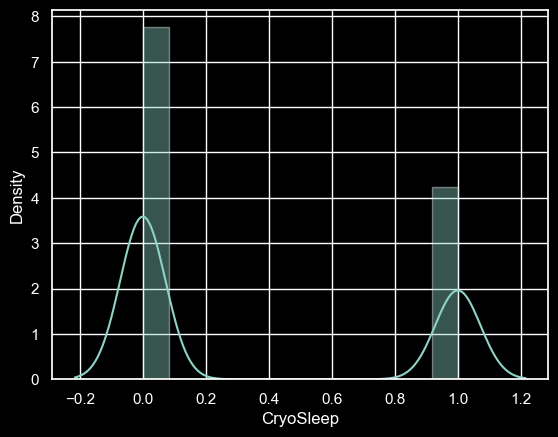

In [168]:
sns.distplot(space_df['CryoSleep'])

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

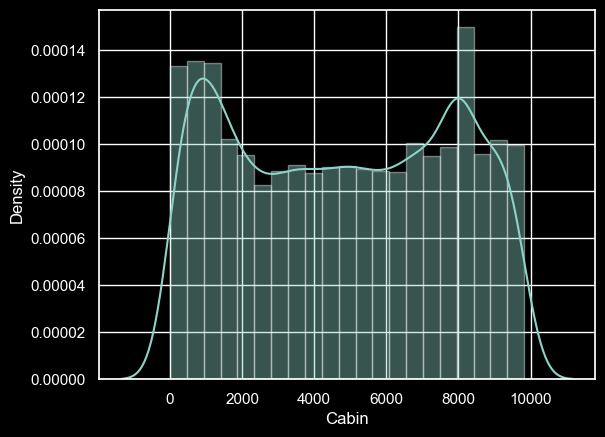

In [169]:
sns.distplot(space_df['Cabin'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

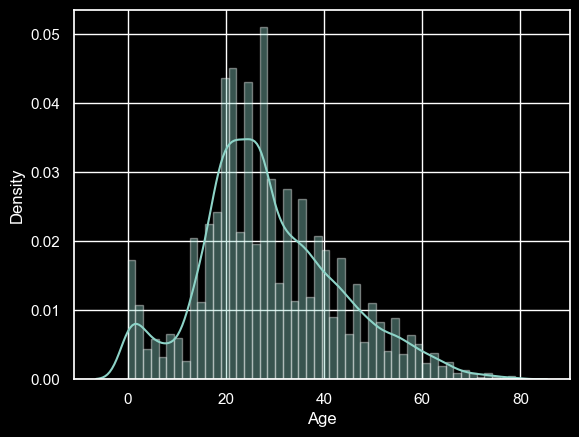

In [170]:
sns.distplot(space_df['Age'])

<AxesSubplot:xlabel='HomePlanet_Earth', ylabel='Density'>

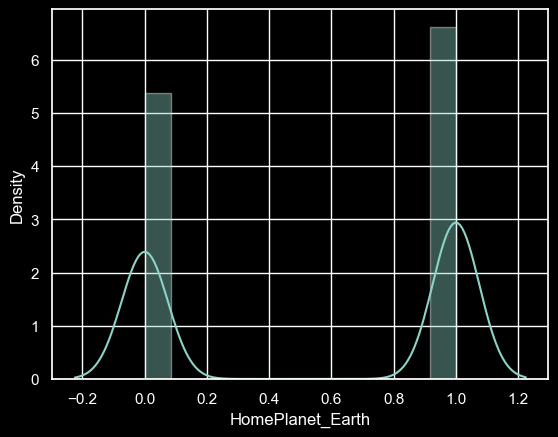

In [171]:
sns.distplot(space_df['HomePlanet_Earth'])

<AxesSubplot:xlabel='HomePlanet_Europa', ylabel='Density'>

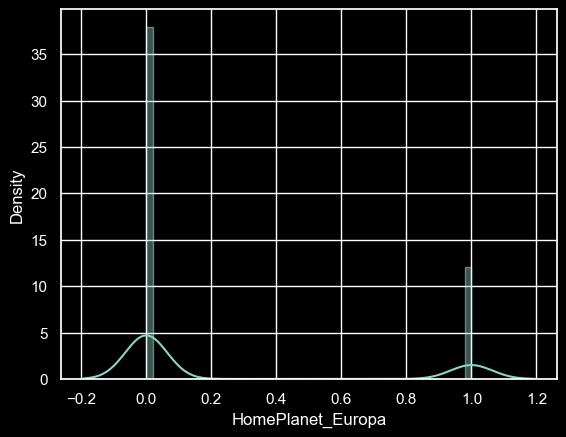

In [172]:
sns.distplot(space_df['HomePlanet_Europa'])

<AxesSubplot:xlabel='Destination_PSO J318.5-22', ylabel='Density'>

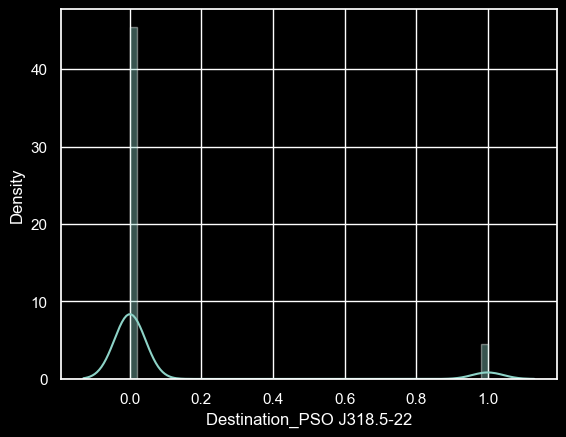

In [173]:
sns.distplot(space_df['Destination_PSO J318.5-22'])

<AxesSubplot:xlabel='Destination_TRAPPIST-1e', ylabel='Density'>

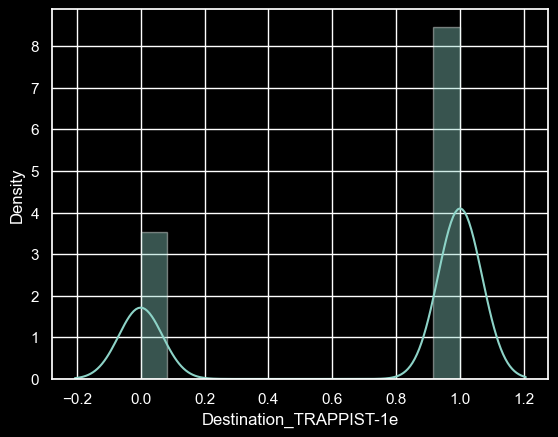

In [174]:
sns.distplot(space_df['Destination_TRAPPIST-1e'])

## 🎯HEATMAP:

<AxesSubplot:>

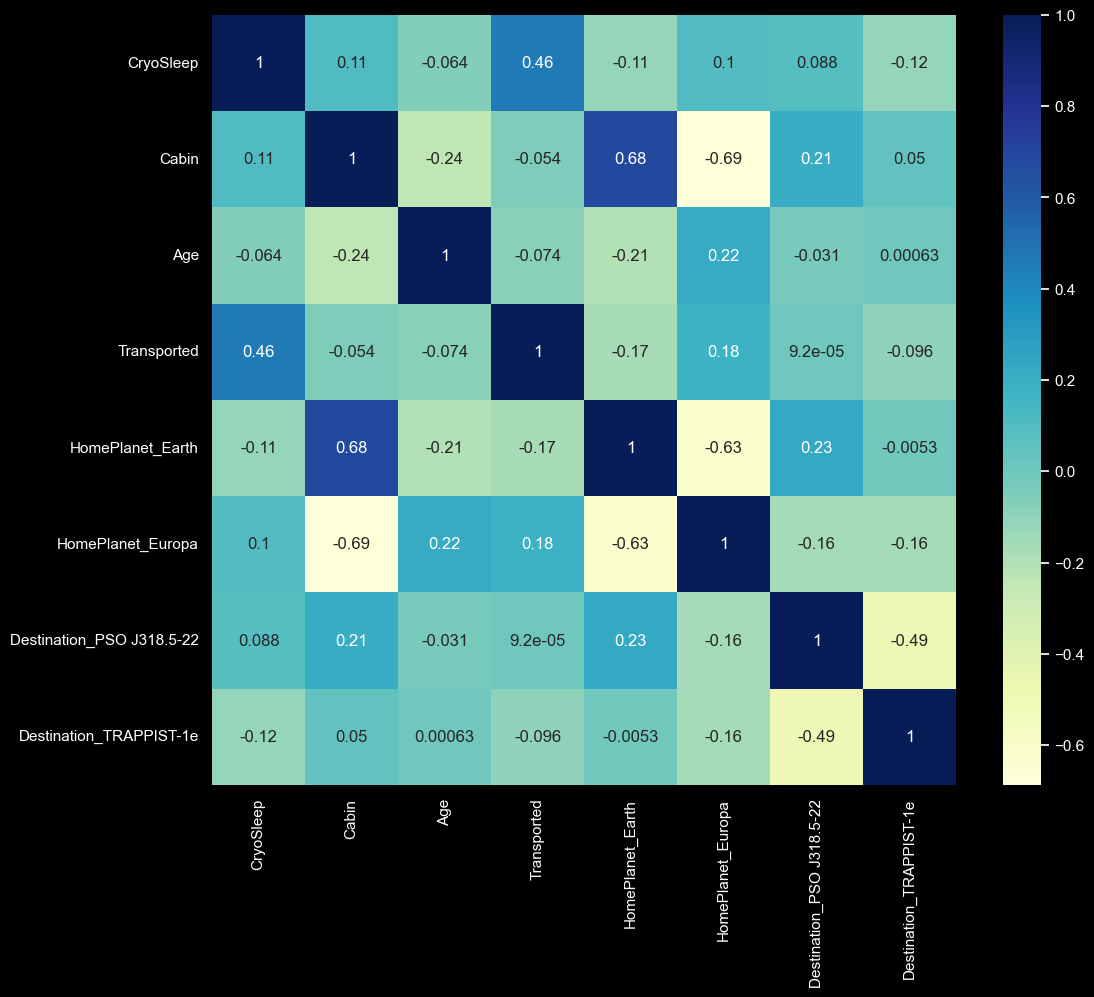

In [175]:
plt.figure(figsize=(12,10))
sns.heatmap(space_df.corr(),annot=True,cmap='YlGnBu')

In [176]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int8   
 1   Cabin                      12970 non-null  int16  
 2   Age                        12970 non-null  float64
 3   data                       12970 non-null  object 
 4   Transported                8693 non-null   float64
 5   HomePlanet_Earth           12970 non-null  uint8  
 6   HomePlanet_Europa          12970 non-null  uint8  
 7   Destination_PSO J318.5-22  12970 non-null  uint8  
 8   Destination_TRAPPIST-1e    12970 non-null  uint8  
dtypes: float64(2), int16(1), int8(1), object(1), uint8(4)
memory usage: 1010.0+ KB


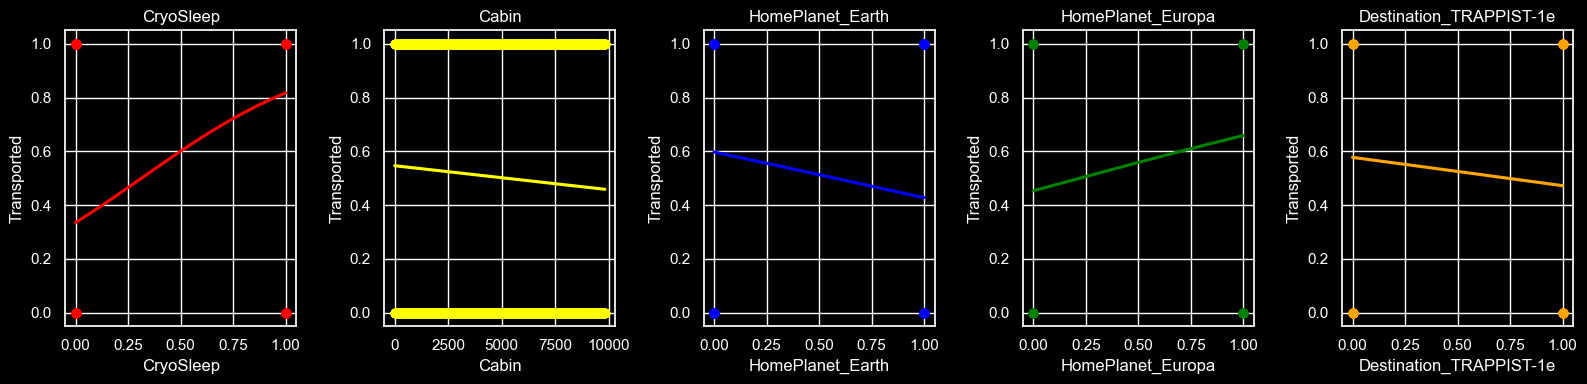

In [177]:
fig, axes = plt.subplots(1, 5, figsize=(16, 4))
plt.style.use('dark_background')
sns.regplot(x='CryoSleep', y='Transported', data=space_df, logistic=True, ci=None, ax=axes[0],color ='red')
axes[0].set_title('CryoSleep')
sns.regplot(x='Cabin', y='Transported', data=space_df, logistic=True, ci=None, ax=axes[1], color = 'yellow')
axes[1].set_title('Cabin')
sns.regplot(x='HomePlanet_Earth', y='Transported', data=space_df, logistic=True, ci=None, ax=axes[2], color = 'blue')
axes[2].set_title('HomePlanet_Earth')
sns.regplot(x='HomePlanet_Europa', y='Transported', data=space_df, logistic=True, ci=None, ax=axes[3], color = 'green')
axes[3].set_title('HomePlanet_Europa')
sns.regplot(x='Destination_TRAPPIST-1e', y='Transported', data=space_df, logistic=True, ci=None, ax=axes[4], color = 'orange')
axes[4].set_title('Destination_TRAPPIST-1e')
plt.tight_layout()
plt.show()


In [178]:
import dtale
import dtale.app as datle_app
dtale.show(space_df)

#  🎯 Binary class Logistic Regression

## 👉-Split the data for Test and Train

In [179]:
train=space_df[space_df['data']=='train']
test=space_df[space_df['data']=='test']

## 👉-Split data into Independent and Dependent Variables

In [180]:
train

,CryoSleep,Cabin,Age,data,Transported,HomePlanet_Earth,HomePlanet_Europa,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,208,39.0,train,0.0,0,1,0,1
1,0,3241,24.0,train,1.0,1,0,0,1
2,0,1,58.0,train,0.0,0,1,0,1
3,0,1,33.0,train,0.0,0,1,0,1
4,0,3243,16.0,train,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
8688,0,205,41.0,train,0.0,0,1,0,0
8689,1,7962,18.0,train,0.0,1,0,1,0
8690,0,7968,26.0,train,1.0,1,0,0,1
8691,0,3157,32.0,train,0.0,0,1,0,0


In [181]:
test

,CryoSleep,Cabin,Age,data,Transported,HomePlanet_Earth,HomePlanet_Europa,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,8298,27.0,test,NaN,1,0,0,1
1,0,5564,19.0,test,NaN,1,0,0,1
2,1,856,31.0,test,NaN,0,1,0,0
3,0,858,38.0,test,NaN,0,1,0,1
4,0,5785,20.0,test,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...
4272,1,7956,34.0,test,NaN,1,0,0,1
4273,0,7995,42.0,test,NaN,1,0,0,1
4274,1,1905,27.0,test,NaN,0,0,0,0
4275,0,1906,27.0,test,NaN,0,1,0,1


In [182]:
x=train.drop(['Transported','data'],axis=1)

In [183]:
y=train['Transported']

## 👉-Step-1: Split the data for building the model and prediction
- Train size = 0.=25 **
- Split the data (75% Train and 25% Test)

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=1,stratify=y)

## 👉-Step-2: Buiulding Logistic Regression model

In [185]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

## 👉-Step-3: Prediction

In [186]:
y_pred_train=logit_model.predict(x_train)
y_pred_test=logit_model.predict(x_test)

In [187]:
y_pred_train

array([0., 0., 0., ..., 0., 0., 1.])

In [188]:
y_pred_test

array([1., 1., 1., ..., 1., 0., 0.])

## 👉-Step-4: Evaluation

In [189]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_train))
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_test))
print('classification_report_train:',classification_report(y_train,y_pred_train))
print('classification_report_test:',classification_report(y_test,y_pred_test))

print('accuracy_score_train:',accuracy_score(y_train,y_pred_train))
print('accuracy_score_test:',accuracy_score(y_test,y_pred_test))

Confusion_matrix_train: [[2440  796]
 [1106 2177]]
Confusion_matrix_test: [[834 245]
 [368 727]]
classification_report_train:               precision    recall  f1-score   support

         0.0       0.69      0.75      0.72      3236
         1.0       0.73      0.66      0.70      3283

    accuracy                           0.71      6519
   macro avg       0.71      0.71      0.71      6519
weighted avg       0.71      0.71      0.71      6519

classification_report_test:               precision    recall  f1-score   support

         0.0       0.69      0.77      0.73      1079
         1.0       0.75      0.66      0.70      1095

    accuracy                           0.72      2174
   macro avg       0.72      0.72      0.72      2174
weighted avg       0.72      0.72      0.72      2174

accuracy_score_train: 0.7082374597330879
accuracy_score_test: 0.7180312787488501


## 👉Step-5: Cross Validation

In [190]:
from sklearn.model_selection import cross_val_score
training_accuracy=cross_val_score(logit_model,x_train,y_train,cv=10)
test_accuracy=cross_val_score(logit_model,x_test,y_test,cv=10)
print('=='*35)
print('training_accuracy:',training_accuracy)
print('=='*35)
print('training_accuracy:',test_accuracy)
print('=='*35)
print('training_accuracy mean:',training_accuracy.mean())
print('=='*35)
print('testing_accuracy mean:',test_accuracy.mean())
print('=='*35)
print('training_accuracy max:',training_accuracy.max())
print('=='*35)
print('testing_accuracy max:',test_accuracy.max())

training_accuracy: [0.71165644 0.68404908 0.70092025 0.73619632 0.67791411 0.73466258
 0.71165644 0.71932515 0.69785276 0.73579109]
training_accuracy: [0.73853211 0.72018349 0.69724771 0.73853211 0.71889401 0.68663594
 0.69585253 0.71889401 0.70506912 0.7235023 ]
training_accuracy mean: 0.7110024219464156
testing_accuracy mean: 0.7143343339111318
training_accuracy max: 0.7361963190184049
testing_accuracy max: 0.7385321100917431


In [191]:
from sklearn.model_selection import GridSearchCV

Trainging Accuracy Score : 0.7082374597330879
Test Accuracy Score : 0.7180312787488501

                Classification_report_Train
              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72      3236
         1.0       0.73      0.66      0.70      3283

    accuracy                           0.71      6519
   macro avg       0.71      0.71      0.71      6519
weighted avg       0.71      0.71      0.71      6519

                Classification_report_Test
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73      1079
         1.0       0.75      0.66      0.70      1095

    accuracy                           0.72      2174
   macro avg       0.72      0.72      0.72      2174
weighted avg       0.72      0.72      0.72      2174

confusion_matrix_Test : 
 
 [[834 245]
 [368 727]]
confusion_matrix_Train : 
 
 [[2440  796]
 [1106 2177]]


Text(0.5, 1.0, 'confusion_matrix_Test')

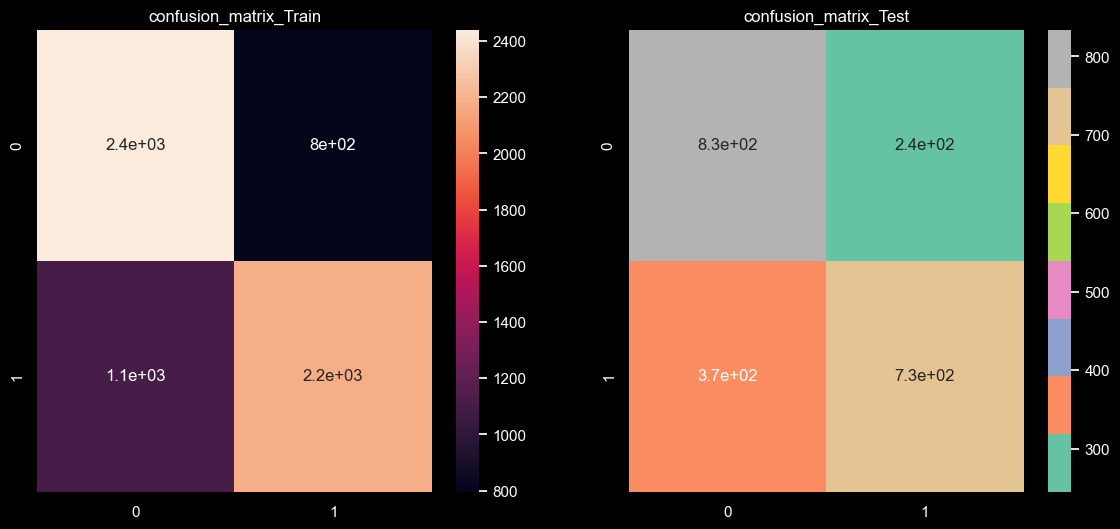

In [192]:
param_grid={'penalty':['l1', 'l2', 'elasticnet', None],
            'C':[0.5,1.0]}
grid=GridSearchCV(LogisticRegression(),param_grid,refit=True)
grid.fit(x_train,y_train)
log_grid_pred_train=grid.predict(x_train)
log_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, log_grid_pred_train)
Test_acc = accuracy_score(y_test, log_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, log_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, log_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, log_grid_pred_train)
cm_test = confusion_matrix(y_test, log_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

In [193]:
training_accuracy=cross_val_score(grid,x_train,y_train,cv=10)
test_accuracy=cross_val_score(grid,x_test,y_test,cv=10)
print('=='*35)
print('training_accuracy:',training_accuracy)
print('=='*35)
print('training_accuracy:',test_accuracy)
print('=='*35)
print('training_accuracy mean:',training_accuracy.mean())
print('=='*35)
print('testing_accuracy mean:',test_accuracy.mean())
print('=='*35)

training_accuracy: [0.71165644 0.68404908 0.70092025 0.73619632 0.67944785 0.73466258
 0.71165644 0.71932515 0.69785276 0.73271889]
training_accuracy: [0.73853211 0.72477064 0.69724771 0.73853211 0.71428571 0.68663594
 0.69585253 0.71889401 0.70506912 0.7235023 ]
training_accuracy mean: 0.710848576517486
testing_accuracy mean: 0.7143322200143746


## Accuracy of train and test data by Cross validation

### 👉training_accuracy mean: 71%
### 👉testing_accuracy mean: 71%

In [212]:
logit_acc=test_accuracy.mean()
logit_acc_train=training_accuracy.mean()

## 🎯Receiver Operating Characteristic with Area Under Curve

In [143]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc=roc_auc_score(y_test,y_pred_test)
logistic_roc_auc

0.7184324230536476

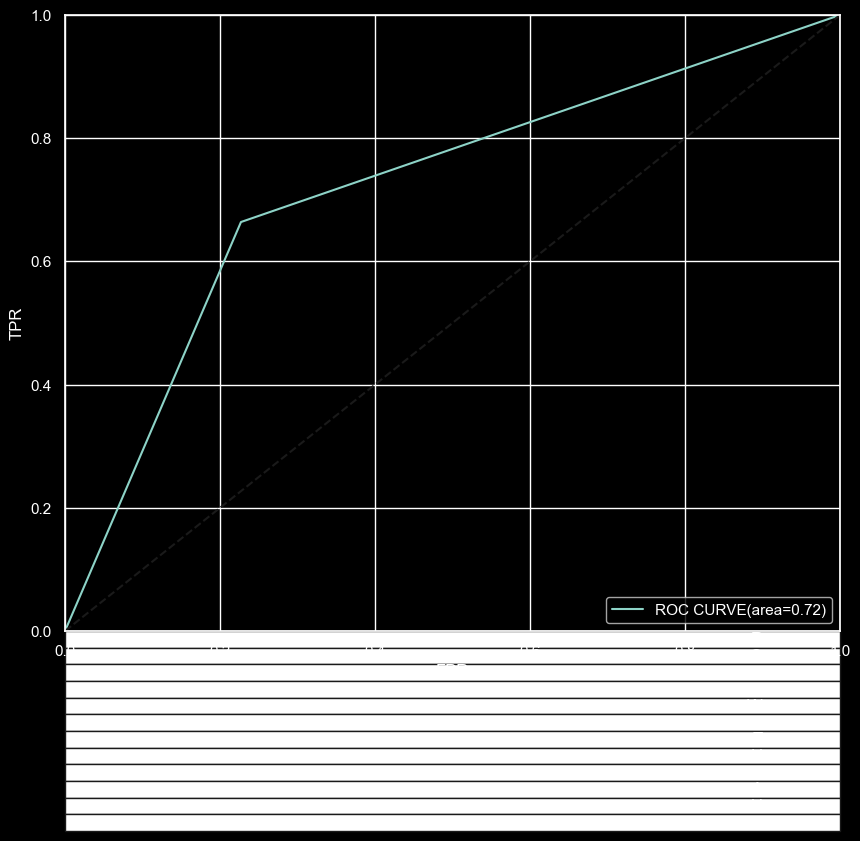

In [144]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label='ROC CURVE(area=%0.2f)'%logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.table('ROC WITH AUC')
plt.legend(loc='lower right')
plt.show()

# Summary of my Logistic Model
### Based on the provided training and testing results, along with the AUC-ROC curve analysis, let's interpret the performance of the logistic regression model:
#### Training and Testing Accuracy (after cross validation):
#### Training Accuracy Score: Approximately 71%
#### Test Accuracy Score: Approximately 71%

### Interpretation: 
- The model achieves an accuracy of approximately 71% on the training data and 71% on the testing data. This indicates that the model performs reasonably well in predicting the correct class labels for both datasets. There is a scope for improvement.
## Overall Interpretation:
- The logistic regression model shows a reasonably good performance, with accuracy scores of
around 71% on the training data and 71% on the testing data even after cross validation
- The classification report indicates that the model performs better in identifying negative cases
(0) compared to positive cases (1) for both the training and testing datasets. There is imbalancy
between Recall, precision and F1 score
- The AUC-ROC curve analysis suggests moderate discrimination power of the model in
distinguishing between positive and negative cases.

# 🎯DECISION TREE

In [145]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [146]:
y_pred_train_dt=dtree.predict(x_train)
y_pred_test_dt=dtree.predict(x_test)

In [147]:
y_pred_train_dt

array([0., 0., 1., ..., 0., 0., 1.])

In [148]:
y_pred_test_dt

array([1., 1., 1., ..., 0., 1., 0.])

In [149]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_train_dt))
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_test_dt))
print('classification_report_train:',classification_report(y_train,y_pred_train_dt))
print('classification_report_test:',classification_report(y_test,y_pred_test_dt))

print('accuracy_score_train:',accuracy_score(y_train,y_pred_train_dt))
print('accuracy_score_test:',accuracy_score(y_test,y_pred_test_dt))

Confusion_matrix_train: [[3234    2]
 [  12 3271]]
Confusion_matrix_test: [[693 386]
 [332 763]]
classification_report_train:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3236
         1.0       1.00      1.00      1.00      3283

    accuracy                           1.00      6519
   macro avg       1.00      1.00      1.00      6519
weighted avg       1.00      1.00      1.00      6519

classification_report_test:               precision    recall  f1-score   support

         0.0       0.68      0.64      0.66      1079
         1.0       0.66      0.70      0.68      1095

    accuracy                           0.67      2174
   macro avg       0.67      0.67      0.67      2174
weighted avg       0.67      0.67      0.67      2174

accuracy_score_train: 0.9978524313545022
accuracy_score_test: 0.6697332106715731


## Feature Importance Variable

In [83]:
dtree.feature_importances_

array([0.21075317, 0.45608533, 0.23592484, 0.04806654, 0.00310707,
       0.01610661, 0.02995643])

In [150]:
pd.DataFrame(index=x.columns, data=dtree.feature_importances_, columns=['Feature Importance'])

,Feature Importance
CryoSleep,0.210753
Cabin,0.458581
Age,0.233891
HomePlanet_Earth,0.049640
HomePlanet_Europa,0.002978
Destination_PSO J318.5-22,0.014142
Destination_TRAPPIST-1e,0.030015


Trainging Accuracy Score : 0.7370762386869152
Test Accuracy Score : 0.7332106715731371

                Classification_report_Train
              precision    recall  f1-score   support

         0.0       0.69      0.86      0.76      3236
         1.0       0.81      0.62      0.70      3283

    accuracy                           0.74      6519
   macro avg       0.75      0.74      0.73      6519
weighted avg       0.75      0.74      0.73      6519

                Classification_report_Test
              precision    recall  f1-score   support

         0.0       0.69      0.85      0.76      1079
         1.0       0.80      0.62      0.70      1095

    accuracy                           0.73      2174
   macro avg       0.75      0.73      0.73      2174
weighted avg       0.75      0.73      0.73      2174

confusion_matrix_Test : 
 
 [[913 166]
 [414 681]]
confusion_matrix_Train : 
 
 [[2772  464]
 [1250 2033]]


Text(0.5, 1.0, 'confusion_matrix_Test')

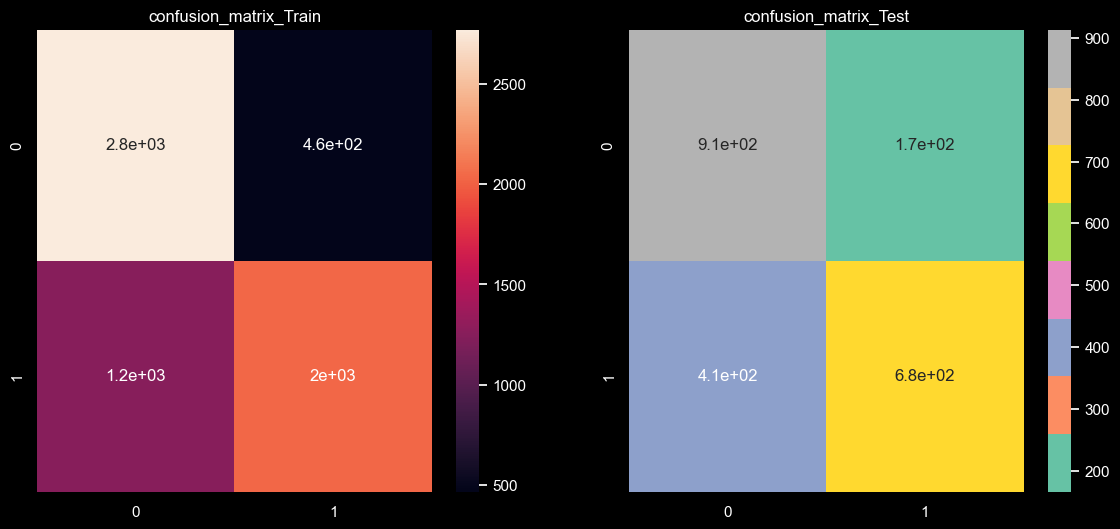

In [151]:
param_grid={'criterion':["gini", "entropy"],
            'splitter' :["best", "random"],
            'max_depth':[2,4,6,7,10],
            'max_features':["auto", "sqrt", "log2"],
            'random_state':[None]
             }
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True)
grid.fit(x_train,y_train)
DT_grid_pred_train=grid.predict(x_train)
DT_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, DT_grid_pred_train)
Test_acc = accuracy_score(y_test, DT_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, DT_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, DT_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, DT_grid_pred_train)
cm_test = confusion_matrix(y_test, DT_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

In [152]:
print('Accuracy of the Train data before Hyper Tuning :',accuracy_score(y_train,y_pred_train_dt))
print('===============================================================================================')
print('Accuracy of the Test data before Hyper Tuning :',accuracy_score(y_test,y_pred_test_dt))
print('===============================================================================================')
print('Accuracy of the Train data after Hyper Tuning :',accuracy_score(y_train,DT_grid_pred_train))
print('===============================================================================================')
print('Accuracy of the Test data after Hyper Tuning:',accuracy_score(y_test,DT_grid_pred_test))

Accuracy of the Train data before Hyper Tuning : 0.9978524313545022
Accuracy of the Test data before Hyper Tuning : 0.6697332106715731
Accuracy of the Train data after Hyper Tuning : 0.7370762386869152
Accuracy of the Test data after Hyper Tuning: 0.7332106715731371


### 📌Accuracy of train data by  decisiontree:73.7%
### 📌Accuracy of test data by decisiontree:73.3%

In [214]:
dtree_acc=accuracy_score(y_test,DT_grid_pred_test)
dtree_acc_train=accuracy_score(y_train,DT_grid_pred_train)

# 🎯BaggingClassifier

In [153]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier()

In [154]:
y_pred_bagg_train=bagging.predict(x_train)
y_pred_bagg_test=bagging.predict(x_test)

In [155]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_bagg_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_bagg_test))
print("================================================================================================================")
print('classification_report_train:',classification_report(y_train,y_pred_bagg_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_bagg_test))
print("================================================================================================================")
print('accuracy_score_train:',accuracy_score(y_train,y_pred_bagg_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_bagg_test))


Confusion_matrix_train: [[3211   25]
 [ 155 3128]]

Confusion_matrix_test: [[809 270]
 [400 695]]
classification_report_train:               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      3236
         1.0       0.99      0.95      0.97      3283

    accuracy                           0.97      6519
   macro avg       0.97      0.97      0.97      6519
weighted avg       0.97      0.97      0.97      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.67      0.75      0.71      1079
         1.0       0.72      0.63      0.67      1095

    accuracy                           0.69      2174
   macro avg       0.69      0.69      0.69      2174
weighted avg       0.69      0.69      0.69      2174

accuracy_score_train: 0.9723884031293143

accuracy_score_test: 0.6918123275068997


Trainging Accuracy Score : 0.988801963491333
Test Accuracy Score : 0.6913523459061638

                Classification_report_Train
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3236
         1.0       1.00      0.98      0.99      3283

    accuracy                           0.99      6519
   macro avg       0.99      0.99      0.99      6519
weighted avg       0.99      0.99      0.99      6519

                Classification_report_Test
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70      1079
         1.0       0.71      0.65      0.68      1095

    accuracy                           0.69      2174
   macro avg       0.69      0.69      0.69      2174
weighted avg       0.69      0.69      0.69      2174

confusion_matrix_Test : 
 
 [[792 287]
 [384 711]]
confusion_matrix_Train : 
 
 [[3221   15]
 [  58 3225]]


Text(0.5, 1.0, 'confusion_matrix_Test')

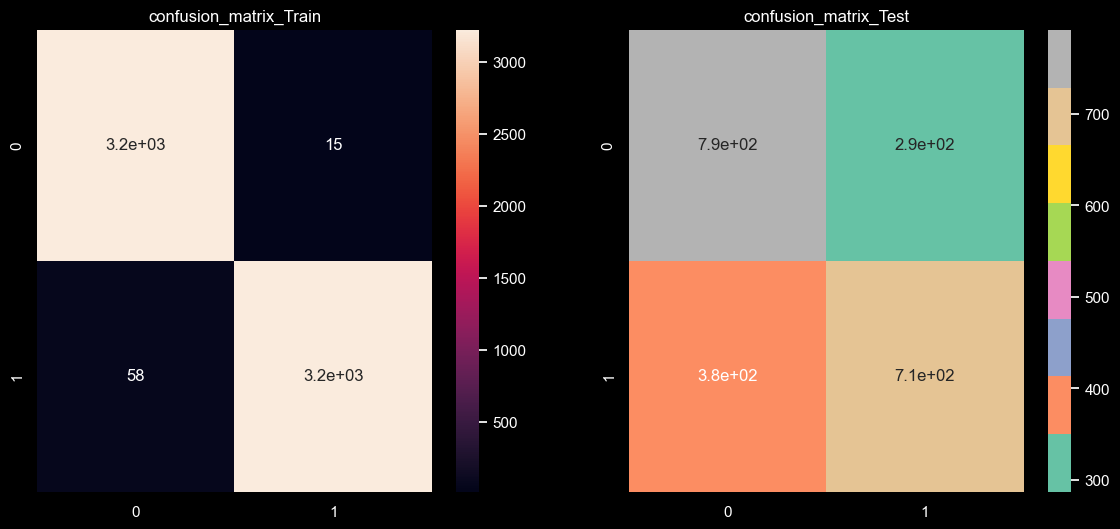

In [156]:
param_grid={'n_estimators':[10,20,30],
            'max_samples':[1.0,5.0,10.0],
            'max_features':[1.0,5.0,10.0],
            'bootstrap':[True,False],
            'oob_score':[True,False]
            }
grid=GridSearchCV(BaggingClassifier(),param_grid,refit=True)
grid.fit(x_train,y_train)
bagg_grid_pred_train=grid.predict(x_train)
bagg_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, bagg_grid_pred_train)
Test_acc = accuracy_score(y_test, bagg_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, bagg_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, bagg_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, bagg_grid_pred_train)
cm_test = confusion_matrix(y_test, bagg_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

### 📌Accuracy of train data by BaggingClassifier:98%
### 📌Accuracy of test data by BaggingClassifier tree:69%

In [215]:
bagg_acc=accuracy_score(y_test, bagg_grid_pred_test)
bagg_acc_train=accuracy_score(y_train, bagg_grid_pred_train)

# 🎯RandomForest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf_cl=RandomForestClassifier()
rf_cl.fit(x_train,y_train)

RandomForestClassifier()

In [158]:
y_pred_train_rf=rf_cl.predict(x_train)
y_pred_test_rf=rf_cl.predict(x_test)

In [159]:
y_pred_train_rf

array([0., 0., 1., ..., 0., 0., 1.])

In [160]:
y_pred_test_rf

array([1., 0., 1., ..., 1., 1., 0.])

In [161]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_train_rf))
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_test_rf))
print('classification_report_train:',classification_report(y_train,y_pred_train_rf))
print('classification_report_test:',classification_report(y_test,y_pred_test_rf))

print('accuracy_score_train:',accuracy_score(y_train,y_pred_train_rf))
print('accuracy_score_test:',accuracy_score(y_test,y_pred_test_rf))

Confusion_matrix_train: [[3231    5]
 [   9 3274]]
Confusion_matrix_test: [[782 297]
 [345 750]]
classification_report_train:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3236
         1.0       1.00      1.00      1.00      3283

    accuracy                           1.00      6519
   macro avg       1.00      1.00      1.00      6519
weighted avg       1.00      1.00      1.00      6519

classification_report_test:               precision    recall  f1-score   support

         0.0       0.69      0.72      0.71      1079
         1.0       0.72      0.68      0.70      1095

    accuracy                           0.70      2174
   macro avg       0.71      0.70      0.70      2174
weighted avg       0.71      0.70      0.70      2174

accuracy_score_train: 0.9978524313545022
accuracy_score_test: 0.7046918123275069


In [105]:
imp_features=rf_cl.feature_importances_
importance_df=pd.DataFrame(rf_cl.feature_importances_,index=x.columns)
importance_df

,0
CryoSleep,0.199110
Cabin,0.507811
Age,0.245760
HomePlanet_Earth,0.022435
HomePlanet_Europa,0.011931
Destination_PSO J318.5-22,0.004116
Destination_TRAPPIST-1e,0.008837


Trainging Accuracy Score : 0.7390704095720203
Test Accuracy Score : 0.7419503219871205

                Classification_report_Train
              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76      3236
         1.0       0.80      0.64      0.71      3283

    accuracy                           0.74      6519
   macro avg       0.75      0.74      0.74      6519
weighted avg       0.75      0.74      0.74      6519

                Classification_report_Test
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77      1079
         1.0       0.81      0.64      0.71      1095

    accuracy                           0.74      2174
   macro avg       0.75      0.74      0.74      2174
weighted avg       0.75      0.74      0.74      2174

confusion_matrix_Test : 
 
 [[914 165]
 [396 699]]
confusion_matrix_Train : 
 
 [[2719  517]
 [1184 2099]]


Text(0.5, 1.0, 'confusion_matrix_Test')

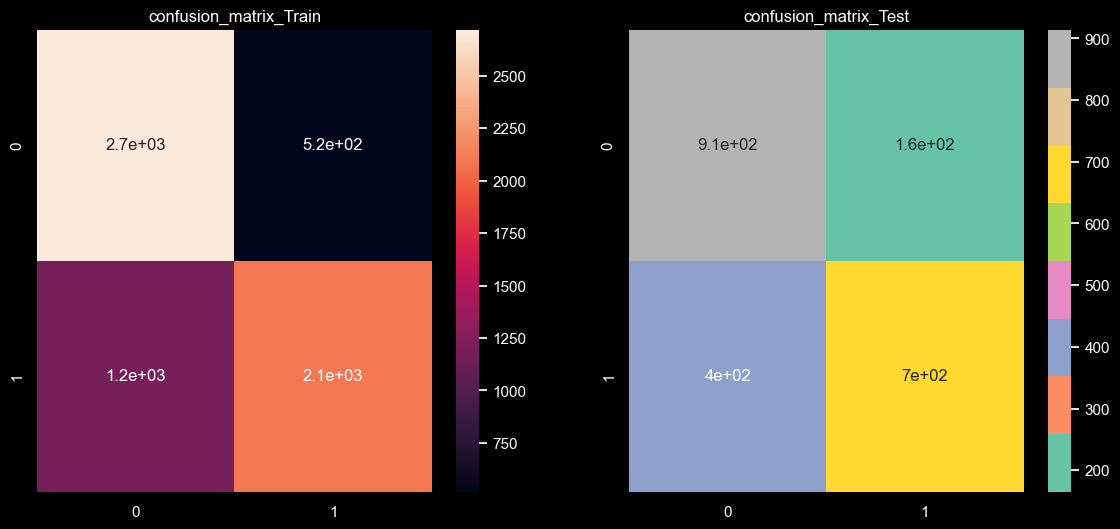

In [162]:
param_grid={'n_estimators':[100],
            'criterion': ['gini','entropy','log_loss'],
            'max_depth' :[None, 2,4,6],
            'min_samples_split' :[2,4,6,8,10],
            'min_samples_leaf' :[1,2,4],
            'max_features':['sqrt','log2',None],
            'oob_score':[True]
            }
grid=GridSearchCV(RandomForestClassifier(),param_grid,refit=True)
grid.fit(x_train,y_train)
rf_grid_pred_train=grid.predict(x_train)
rf_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, rf_grid_pred_train)
Test_acc = accuracy_score(y_test, rf_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, rf_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, rf_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, rf_grid_pred_train)
cm_test = confusion_matrix(y_test, rf_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

In [197]:
print('Accuracy of the Train data before Hyper Tuning by Random Forest :',accuracy_score(y_train,y_pred_train_rf))
print('===============================================================================================')
print('Accuracy of the Test data before Hyper Tuning by Random Forest:',accuracy_score(y_test,y_pred_test_rf))
print('===============================================================================================')
print('Accuracy of the Train data after Hyper Tuning by Random Forest:',accuracy_score(y_train,rf_grid_pred_train))
print('===============================================================================================')
print('Accuracy of the Test data after Hyper Tuning by Random Forest:',accuracy_score(y_test,rf_grid_pred_test))

Accuracy of the Train data before Hyper Tuning by Random Forest : 0.9978524313545022
Accuracy of the Test data before Hyper Tuning by Random Forest: 0.7046918123275069
Accuracy of the Train data after Hyper Tuning by Random Forest: 0.7390704095720203
Accuracy of the Test data after Hyper Tuning by Random Forest: 0.7419503219871205


### 📌Accuracy of train data by Random forest after Hyperparameter tuning:73.9%
### 📌Accuracy of test data by Random forest after Hyperparameter tuning:74.19%

In [216]:
rf_acc=accuracy_score(y_test,rf_grid_pred_test)
rf_acc_train=accuracy_score(y_train,rf_grid_pred_train)

#  🎯NAIVE BAYE'S THEOREM:

## Guassian Naive Baye's :

In [112]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [113]:
y_pred_gnb_train=gnb.predict(x_train)
y_pred_gnb_test=gnb.predict(x_test)

In [114]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_gnb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_gnb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_gnb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_gnb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_gnb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_gnb_test))

Confusion_matrix_train: [[2265  971]
 [1043 2240]]

Confusion_matrix_test: [[779 300]
 [347 748]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.68      0.70      0.69      3236
         1.0       0.70      0.68      0.69      3283

    accuracy                           0.69      6519
   macro avg       0.69      0.69      0.69      6519
weighted avg       0.69      0.69      0.69      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.69      0.72      0.71      1079
         1.0       0.71      0.68      0.70      1095

    accuracy                           0.70      2174
   macro avg       0.70      0.70      0.70      2174
weighted avg       0.70      0.70      0.70      2174

************************************************************
accuracy_score_train: 0.6910569105691057

accuracy_score_test: 0.702

## BERNOULLIS NAIVE BAYE'S:

In [115]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [116]:
y_pred_bnb_train=bnb.predict(x_train)
y_pred_bnb_test=bnb.predict(x_test)

In [117]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_bnb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_bnb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_bnb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_bnb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_bnb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_bnb_test))

Confusion_matrix_train: [[2249  987]
 [ 980 2303]]

Confusion_matrix_test: [[774 305]
 [334 761]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.70      0.69      0.70      3236
         1.0       0.70      0.70      0.70      3283

    accuracy                           0.70      6519
   macro avg       0.70      0.70      0.70      6519
weighted avg       0.70      0.70      0.70      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      1079
         1.0       0.71      0.69      0.70      1095

    accuracy                           0.71      2174
   macro avg       0.71      0.71      0.71      2174
weighted avg       0.71      0.71      0.71      2174

************************************************************
accuracy_score_train: 0.6982666053075625

accuracy_score_test: 0.706

In [118]:
print('Accuracy of the Train data by GaussianNB :',accuracy_score(y_train,y_pred_gnb_train))
print('===============================================================================================')
print('Accuracy of the Test data  by GaussianNB:',accuracy_score(y_test,y_pred_gnb_test))
print('===============================================================================================')
print('Accuracy of the Train data by BernoulliNB:',accuracy_score(y_train,y_pred_bnb_train))
print('===============================================================================================')
print('Accuracy of the Test data  by BernoulliNB  :',accuracy_score(y_test,y_pred_bnb_test))

Accuracy of the Train data by GaussianNB : 0.6910569105691057
Accuracy of the Test data  by GaussianNB: 0.702391904323827
Accuracy of the Train data by BernoulliNB: 0.6982666053075625
Accuracy of the Test data  by BernoulliNB  : 0.7060717571297148


### 📌Accuracy of train data by GaussianNB:69%
### 📌Accuracy of test data by GaussianNB:70%
### 📌Accuracy of train data by BernoullliNB:69%
### 📌Accuracy of test data by BernoullliNB:70%

In [217]:
gnb_acc=accuracy_score(y_test,y_pred_gnb_test)
bnb_acc=accuracy_score(y_test,y_pred_bnb_test)
gnb_acc_train=accuracy_score(y_train,y_pred_gnb_train)
bnb_acc_train=accuracy_score(y_train,y_pred_bnb_train)

# 🎯K-NEAREST NEIGHBOR:

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    y_pred_knn_train=knn.predict(x_train)
    y_pred_knn_test=knn.predict(x_test)
    error_rate.append(np.mean(y_test!=y_pred_knn_test))

error_rate

[0.45262189512419504,
 0.4549218031278749,
 0.43974241030358785,
 0.4494020239190432,
 0.43238270469181234,
 0.4204231830726771,
 0.42870285188592455,
 0.42272309107635697,
 0.42318307267709293,
 0.4181232750689972,
 0.4245630174793008,
 0.41674333026678934,
 0.42410303587856485,
 0.406163753449862,
 0.4162833486660534,
 0.4107635694572217,
 0.4190432382704692,
 0.4126034958601656,
 0.41766329346826125,
 0.41214351425942963,
 0.4208831646734131,
 0.4139834406623735,
 0.4181232750689972,
 0.41122355105795766,
 0.4162833486660534,
 0.4172033118675253,
 0.41306347746090155,
 0.4107635694572217,
 0.4080036798528059,
 0.40708371665133397,
 0.41030358785648574,
 0.406163753449862,
 0.4006439742410304,
 0.39926402943882244,
 0.3969641214351426,
 0.4006439742410304,
 0.39558417663293466,
 0.3988040478380865,
 0.3983440662373505,
 0.40018399264029436,
 0.3988040478380865,
 0.39144434222631097,
 0.3932842686292548,
 0.39650413983440663,
 0.3960441582336707,
 0.39650413983440663,
 0.3946642134314

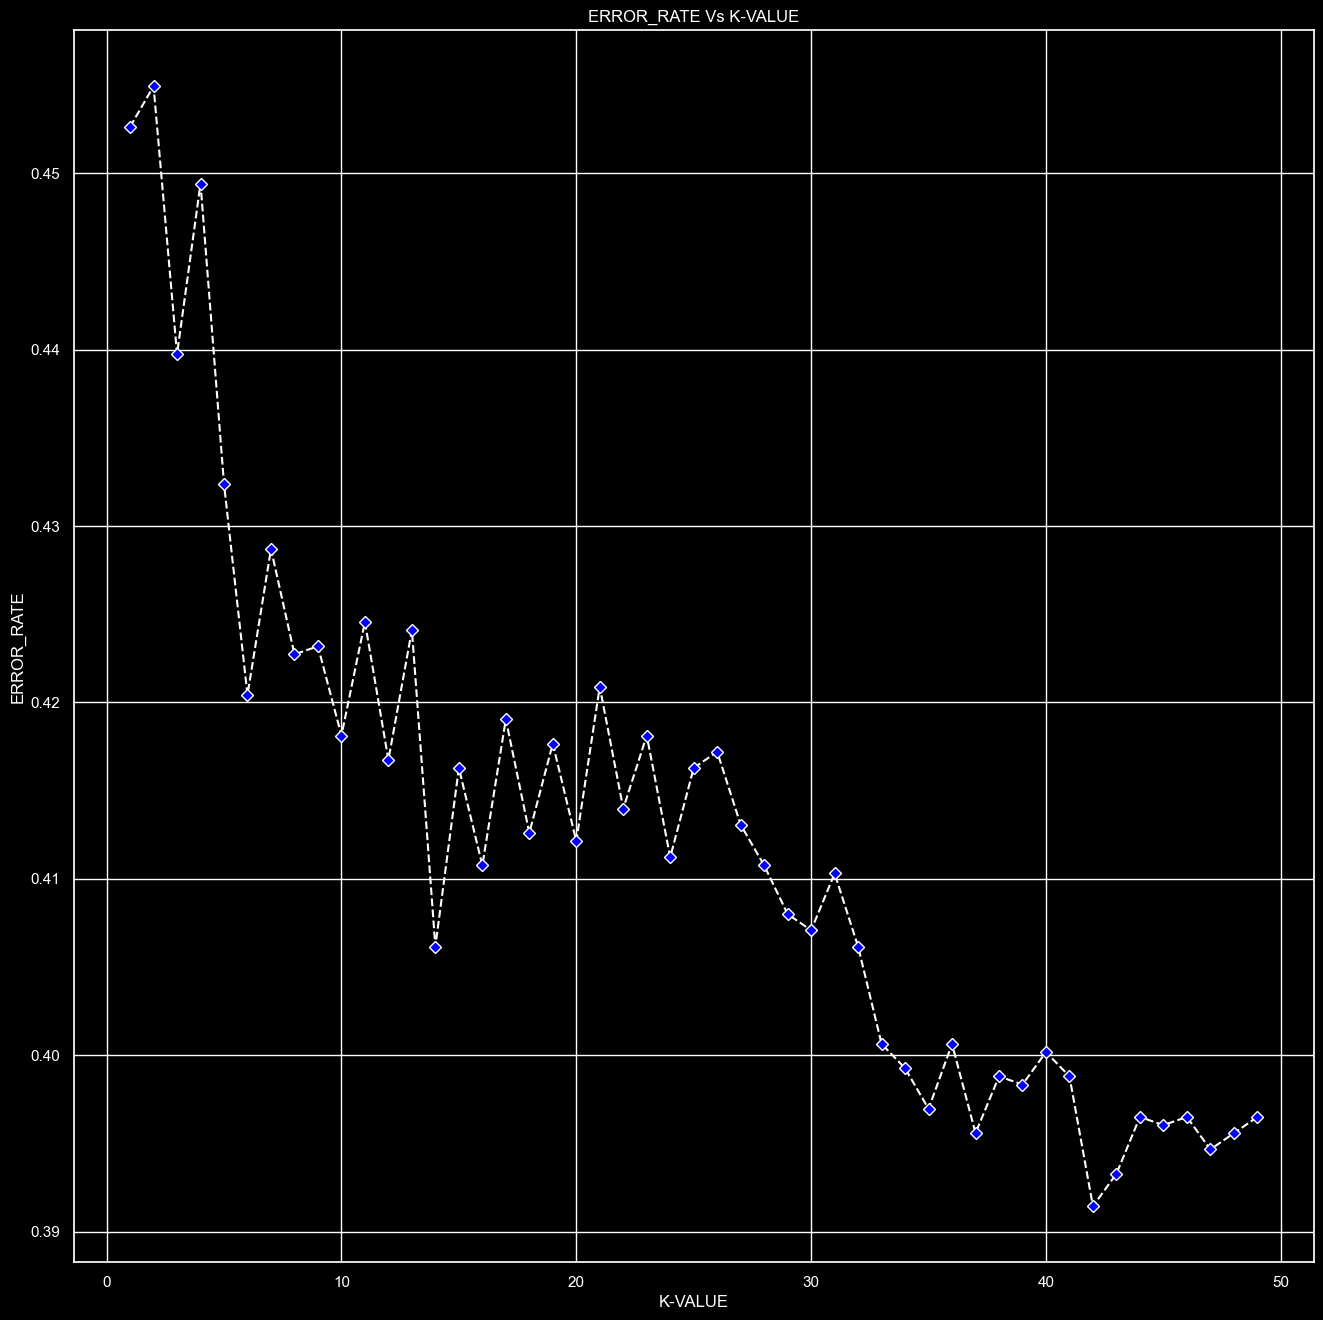

In [121]:
plt.figure(figsize=(16,16))
plt.plot(range(1,50),error_rate,color='white',linestyle='dashed',marker='D',markerfacecolor='blue')
plt.title('ERROR_RATE Vs K-VALUE')
plt.xlabel('K-VALUE')
plt.ylabel('ERROR_RATE')
plt.show()

Trainging Accuracy Score : 0.6401288541187299
Test Accuracy Score : 0.6034958601655934

                Classification_report_Train
              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65      3236
         1.0       0.66      0.60      0.63      3283

    accuracy                           0.64      6519
   macro avg       0.64      0.64      0.64      6519
weighted avg       0.64      0.64      0.64      6519

                Classification_report_Test
              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62      1079
         1.0       0.62      0.56      0.59      1095

    accuracy                           0.60      2174
   macro avg       0.60      0.60      0.60      2174
weighted avg       0.60      0.60      0.60      2174

confusion_matrix_Test : 
 
 [[700 379]
 [483 612]]
confusion_matrix_Train : 
 
 [[2205 1031]
 [1315 1968]]


Text(0.5, 1.0, 'confusion_matrix_Test')

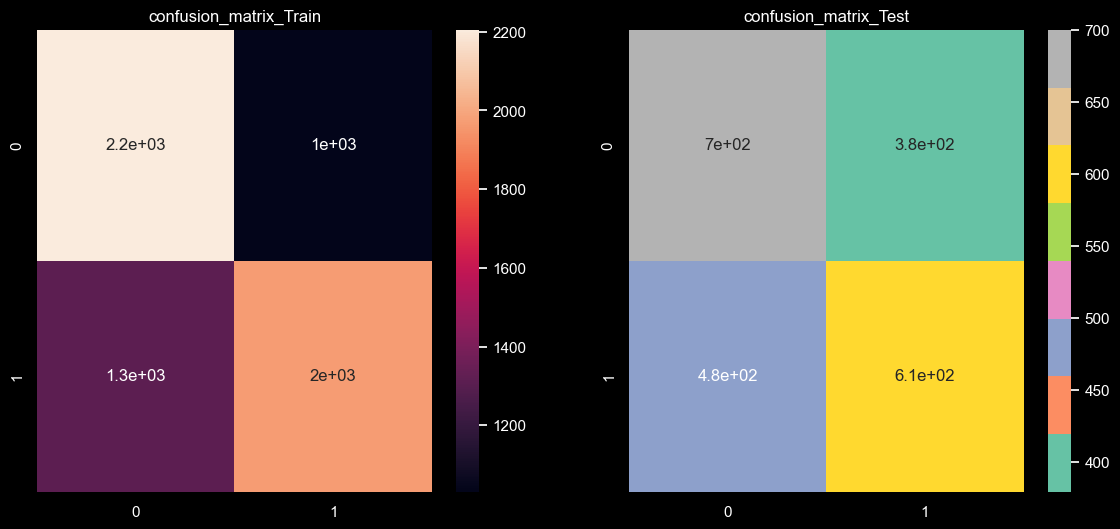

In [163]:
param_grid={'n_neighbors':[5,10,15,23,25,30],
           'weights':['uniform'],
           'algorithm':['auto'],
          'leaf_size':[30],
           'p':[2,1],
          'metric':['minkowski']
           }
grid=GridSearchCV(KNeighborsClassifier(),param_grid,refit=True)
grid.fit(x_train,y_train)
knn_grid_pred_train=grid.predict(x_train)
knn_grid_pred_test=grid.predict(x_test)
Train_acc = accuracy_score(y_train, knn_grid_pred_train)
Test_acc = accuracy_score(y_test, knn_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, knn_grid_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, knn_grid_pred_test))
print('=='*35)
cm_train= confusion_matrix(y_train, knn_grid_pred_train)
cm_test = confusion_matrix(y_test, knn_grid_pred_test)
print('===='*10)
print( 'confusion_matrix_Test :','\n','\n',cm_test)
print('===='*10)
print( 'confusion_matrix_Train :','\n','\n',cm_train)
print('===='*10)
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot = True, )
plt.title('confusion_matrix_Train')
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot = True, cmap= 'Set2')
plt.title('confusion_matrix_Test')

### 📌Accuracy of train data by K-NEAREST NEIGHBOR:64%
### 📌Accuracy of test data by K-NEAREST NEIGHBOR:60%

In [218]:
knn_acc=accuracy_score(y_test, knn_grid_pred_test)
knn_acc_train=accuracy_score(y_train, knn_grid_pred_train)

# 🎯Support Vector Machine (SVM)

In [124]:
from sklearn.svm import SVC

In [125]:
#kernel=linear
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_svm_train=svm_linear.predict(x_train)
y_pred_svm_test=svm_linear.predict(x_test)

In [126]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_svm_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_svm_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_svm_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_svm_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_svm_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_svm_test))

Confusion_matrix_train: [[2702  534]
 [1309 1974]]

Confusion_matrix_test: [[902 177]
 [438 657]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.67      0.83      0.75      3236
         1.0       0.79      0.60      0.68      3283

    accuracy                           0.72      6519
   macro avg       0.73      0.72      0.71      6519
weighted avg       0.73      0.72      0.71      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.67      0.84      0.75      1079
         1.0       0.79      0.60      0.68      1095

    accuracy                           0.72      2174
   macro avg       0.73      0.72      0.71      2174
weighted avg       0.73      0.72      0.71      2174

************************************************************
accuracy_score_train: 0.7172879275962571

accuracy_score_test: 0.717

In [127]:
#kernel=sigmoidal
svm_sigmoid=SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train,y_train)
y_pred_svm_sigmoid_train=svm_sigmoid.predict(x_train)
y_pred_svm_sigmoid_test=svm_sigmoid.predict(x_test)

In [128]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_svm_sigmoid_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_svm_sigmoid_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_svm_sigmoid_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_svm_sigmoid_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_svm_sigmoid_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_svm_sigmoid_test))

Confusion_matrix_train: [[1447 1789]
 [1779 1504]]

Confusion_matrix_test: [[475 604]
 [625 470]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.45      0.45      0.45      3236
         1.0       0.46      0.46      0.46      3283

    accuracy                           0.45      6519
   macro avg       0.45      0.45      0.45      6519
weighted avg       0.45      0.45      0.45      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.43      0.44      0.44      1079
         1.0       0.44      0.43      0.43      1095

    accuracy                           0.43      2174
   macro avg       0.43      0.43      0.43      2174
weighted avg       0.43      0.43      0.43      2174

************************************************************
accuracy_score_train: 0.4526767909188526

accuracy_score_test: 0.434

In [129]:
#kernel=poly
svm_poly=SVC(kernel='poly')
svm_poly.fit(x_train,y_train)
y_pred_svm_poly_train=svm_poly.predict(x_train)
y_pred_svm_poly_test=svm_poly.predict(x_test)

In [130]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_svm_poly_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_svm_poly_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_svm_poly_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_svm_poly_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_svm_poly_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_svm_poly_test))

Confusion_matrix_train: [[   0 3236]
 [   0 3283]]

Confusion_matrix_test: [[   0 1079]
 [   0 1095]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3236
         1.0       0.50      1.00      0.67      3283

    accuracy                           0.50      6519
   macro avg       0.25      0.50      0.33      6519
weighted avg       0.25      0.50      0.34      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1079
         1.0       0.50      1.00      0.67      1095

    accuracy                           0.50      2174
   macro avg       0.25      0.50      0.33      2174
weighted avg       0.25      0.50      0.34      2174

************************************************************
accuracy_score_train: 0.5036048473692284

accuracy_score_test: 0

In [131]:
#rbf(radial basis function)---->by default kernel
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
y_pred_svm_rbf_train=svm_rbf.predict(x_train)
y_pred_svm_rbf_test=svm_rbf.predict(x_test)

In [132]:
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_svm_rbf_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_svm_rbf_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_svm_rbf_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_svm_rbf_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_svm_rbf_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_svm_rbf_test))

Confusion_matrix_train: [[1958 1278]
 [1598 1685]]

Confusion_matrix_test: [[676 403]
 [520 575]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.55      0.61      0.58      3236
         1.0       0.57      0.51      0.54      3283

    accuracy                           0.56      6519
   macro avg       0.56      0.56      0.56      6519
weighted avg       0.56      0.56      0.56      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.57      0.63      0.59      1079
         1.0       0.59      0.53      0.55      1095

    accuracy                           0.58      2174
   macro avg       0.58      0.58      0.57      2174
weighted avg       0.58      0.58      0.57      2174

************************************************************
accuracy_score_train: 0.5588280411105998

accuracy_score_test: 0.575

In [219]:
svm_acc_lr=accuracy_score(y_test,y_pred_svm_test)
svm_acc_lr_train=accuracy_score(y_train,y_pred_svm_train)

### 📌Accuracy of train data by SVM:71.7%
### 📌Accuracy of test data by SVM:71.7%

# 🎯BOOSTING :

In [133]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [134]:
!pip install Xgboost

In [135]:
adaboost=AdaBoostClassifier()
adb=adaboost.fit(x_train,y_train)
y_pred_adb_train=adb.predict(x_train)
y_pred_adb_test=adb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_adb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_adb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_adb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_adb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_adb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_adb_test))

Confusion_matrix_train: [[2472  764]
 [1034 2249]]

Confusion_matrix_test: [[838 241]
 [346 749]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.71      0.76      0.73      3236
         1.0       0.75      0.69      0.71      3283

    accuracy                           0.72      6519
   macro avg       0.73      0.72      0.72      6519
weighted avg       0.73      0.72      0.72      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.71      0.78      0.74      1079
         1.0       0.76      0.68      0.72      1095

    accuracy                           0.73      2174
   macro avg       0.73      0.73      0.73      2174
weighted avg       0.73      0.73      0.73      2174

************************************************************
accuracy_score_train: 0.7241908268139285

accuracy_score_test: 0.729

In [136]:
gdboost=GradientBoostingClassifier()
gdb=gdboost.fit(x_train,y_train)
y_pred_gdb_train=gdb.predict(x_train)
y_pred_gdb_test=gdb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_gdb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_gdb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_gdb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_gdb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_gdb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_gdb_test))

Confusion_matrix_train: [[2769  467]
 [1183 2100]]

Confusion_matrix_test: [[927 152]
 [405 690]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.70      0.86      0.77      3236
         1.0       0.82      0.64      0.72      3283

    accuracy                           0.75      6519
   macro avg       0.76      0.75      0.74      6519
weighted avg       0.76      0.75      0.74      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.70      0.86      0.77      1079
         1.0       0.82      0.63      0.71      1095

    accuracy                           0.74      2174
   macro avg       0.76      0.74      0.74      2174
weighted avg       0.76      0.74      0.74      2174

************************************************************
accuracy_score_train: 0.7468936953520479

accuracy_score_test: 0.743

In [137]:
from xgboost import XGBClassifier

In [138]:
xgboost=XGBClassifier()
xgb=xgboost.fit(x_train,y_train)
y_pred_xgb_train=xgb.predict(x_train)
y_pred_xgb_test=xgb.predict(x_test)
print('Confusion_matrix_train:',confusion_matrix(y_train,y_pred_xgb_train))
print()
print('Confusion_matrix_test:',confusion_matrix(y_test,y_pred_xgb_test))
print("*"*60)
print('classification_report_train:',classification_report(y_train,y_pred_xgb_train))
print()
print('classification_report_test:',classification_report(y_test,y_pred_xgb_test))
print("*"*60)
print('accuracy_score_train:',accuracy_score(y_train,y_pred_xgb_train))
print()
print('accuracy_score_test:',accuracy_score(y_test,y_pred_xgb_test))

Confusion_matrix_train: [[2993  243]
 [ 733 2550]]

Confusion_matrix_test: [[862 217]
 [380 715]]
************************************************************
classification_report_train:               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      3236
         1.0       0.91      0.78      0.84      3283

    accuracy                           0.85      6519
   macro avg       0.86      0.85      0.85      6519
weighted avg       0.86      0.85      0.85      6519


classification_report_test:               precision    recall  f1-score   support

         0.0       0.69      0.80      0.74      1079
         1.0       0.77      0.65      0.71      1095

    accuracy                           0.73      2174
   macro avg       0.73      0.73      0.72      2174
weighted avg       0.73      0.73      0.72      2174

************************************************************
accuracy_score_train: 0.8502837858567265

accuracy_score_test: 0.725

### 📌Accuracy of train data by BOOSTING:74.6%
### 📌Accuracy of test data by BOOSTIG:74.8%

In [221]:
boost_acc_gdb=accuracy_score(y_test,y_pred_gdb_test)
boost_acc_gdb_train=accuracy_score(y_train,y_pred_gdb_train)

# 🎯SUMMARY

In [222]:
model=['logistic','decisiontree','bagging','randomforest','GaussianNB','BernoulliNB','KNN','SVM','GradientBoost']
Test_Accuracy=[logit_acc,dtree_acc,bagg_acc,rf_acc,gnb_acc,bnb_acc,knn_acc,svm_acc_lr,boost_acc_gdb]
Train_Accuracy=[logit_acc_train,dtree_acc_train,bagg_acc_train,rf_acc_train,gnb_acc_train,bnb_acc_train,knn_acc_train,svm_acc_lr_train,boost_acc_gdb_train]

In [223]:
metrics_df=pd.DataFrame({'model_name':model,'Train_Accuracy':Train_Accuracy,'Test_Accuracy':Test_Accuracy})

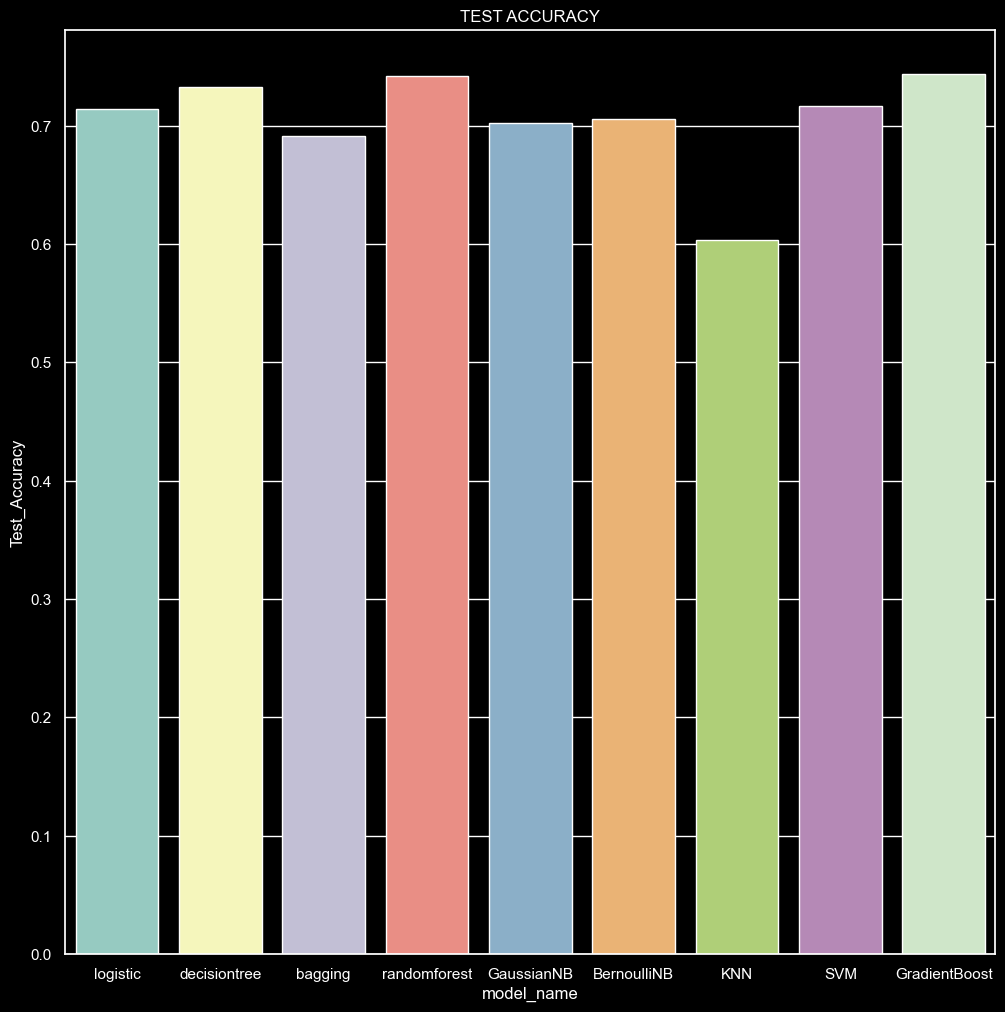

In [227]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Test_Accuracy',data=metrics_df)
plt.title('TEST ACCURACY')
plt.show()

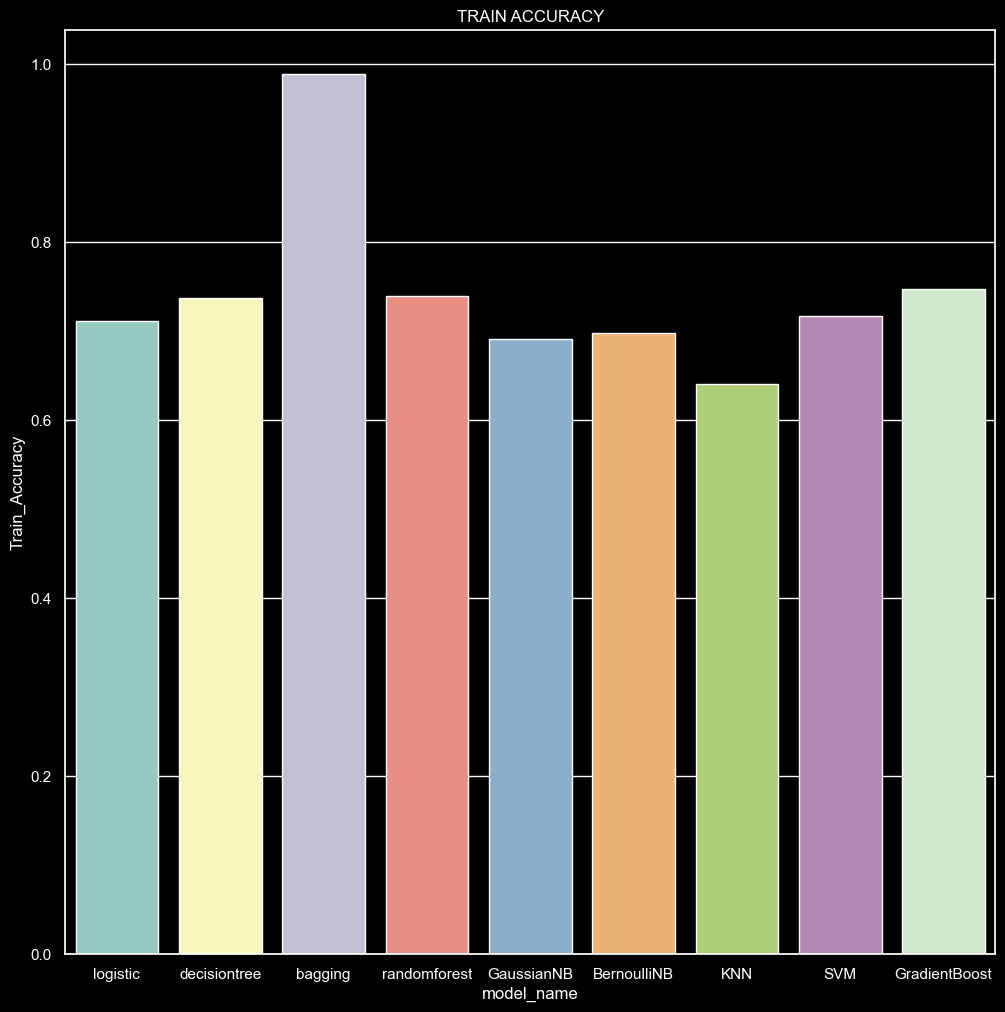

In [228]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Train_Accuracy',data=metrics_df)
plt.title('TRAIN ACCURACY')
plt.show()

In [235]:
metrics_df

,model_name,Train_Accuracy,Test_Accuracy
0,logistic,0.710849,0.714332
1,decisiontree,0.737076,0.733211
2,bagging,0.988802,0.691352
3,randomforest,0.739070,0.741950
4,GaussianNB,0.691057,0.702392
5,BernoulliNB,0.698267,0.706072
6,KNN,0.640129,0.603496
7,SVM,0.717288,0.717111
8,GradientBoost,0.746894,0.743790


#### We can observe that Randomforest,GradientBoosting,SVM are delivering good test accuracies 

In [232]:
rf_var=abs(rf_acc-rf_acc_train)
gdb_var=abs(boost_acc_gdb-boost_acc_gdb_train)
svm_var=abs(svm_acc_lr-svm_acc_lr_train)

In [236]:
print('Random Forest')
print('===========================================================')
print('TRAIN ACCURACY:',rf_acc_train)
print('TEST ACCURACY:',rf_acc)
print('VARIENCE:',rf_var)
print('===========================================================')
print('Gradient Boosting')
print('===========================================================')
print('TRAIN ACCURACY:',boost_acc_gdb_train)
print('TEST ACCURACY:',boost_acc_gdb)
print('VARIENCE:',gdb_var)
print('===========================================================')
print('Support Vector Machine')
print('===========================================================')
print('TRAIN ACCURACY:',svm_acc_lr_train)
print('TEST ACCURACY:',svm_acc_lr)
print('VARIENCE:',svm_var)





Random Forest
TRAIN ACCURACY: 0.7390704095720203
TEST ACCURACY: 0.7419503219871205
VARIENCE: 0.0028799124151002164
Gradient Boosting
TRAIN ACCURACY: 0.7468936953520479
TEST ACCURACY: 0.7437902483900644
VARIENCE: 0.0031034469619835026
Support Vector Machine
TRAIN ACCURACY: 0.7172879275962571
TEST ACCURACY: 0.7171113155473781
VARIENCE: 0.00017661204887908788


#### When we compare all the best 3 models with their test and test accuracies and varience,the 'GRADIENT BOOSTING' is delivering better Train and Test Accuracy and little Varience 

In [234]:
print('TRAIN ACCURACY:',boost_acc_gdb_train)
print('TEST ACCURACY:',boost_acc_gdb)
print('VARIENCE:',gdb_var)

TRAIN ACCURACY: 0.7468936953520479
TEST ACCURACY: 0.7437902483900644
VARIENCE: 0.0031034469619835026


### BEST MODEL:GRADIENT BOOSTING